<a href="https://colab.research.google.com/github/y0tish/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health Insurance Cross Sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual.
##### **Team Member 1 -** Yotish Lakhnpal


# **Project Summary -**

The objective of this project was to help an insurance company predict whether their policyholders from the past year would be interested in vehicle insurance provided by the company. To achieve this, the project started with data cleaning and data wrangling, followed by exploratory data analysis (EDA) which included univariate, bivariate, and multivariate analysis to gain insights into the data.

After the EDA, feature engineering was performed based on the findings from the analysis. Hypothesis testing was also conducted using techniques such as Ch2, ANOVA, and T-test to identify the best features for prediction. Outliers were removed using the IQR method, and the problem of an imbalanced dataset was addressed using the SMOTE technique.

Several classification machine learning models were then trained on the preprocessed data, including Logistic Regression, Gaussian Naive Bayes, Decision Tree, Random Forest, Xtra Tree, Adaboost, and XGBoost. To evaluate the models, metrics such as precision, recall, and ROC AUC score were used.

Based on the evaluation metrics, the Adaboost model was found to have the best performance with a highest ROC AUC score of 0.7934. This means that the Adaboost model is able to accurately predict whether a customer would be interested in vehicle insurance or not, based on the information provided about demographics, vehicles, and policy.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The problem is to build a predictive model to determine whether customers who were provided with Health Insurance by an insurance company in the past year are also likely to be interested in Vehicle Insurance provided by the same company. The model will be based on demographic data such as gender, age, and region code type, vehicle data such as vehicle age and damage, and policy data such as premium and sourcing channel. The aim of this model is to help the company plan its communication strategy and optimize its revenue by targeting those customers who are likely to be interested in Vehicle Insurance.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Capstone 3/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [4]:
# Dataset First Look
dataset

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes         40454.0                  26.0   
1         1-2 Year             No         33536.0                  26.0   
2        > 2 Years            Yes         38294.0                  26.0   
3         < 1 Year             No         28619.0                 152.0   
4         < 1 Year             No         27496.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
0           217         1  
1           183         0  
2            27         1  
3           203         0  
4            39         0  
...         ...       ...  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0  

[381109 rows x 12 columns]

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f'No of Columns:- {dataset.columns.value_counts().sum()}')
print(f'No of Rows:- {dataset.iloc[:].value_counts().sum()}')

No of Columns:- 12
No of Rows:- 381109


### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


* **Dataset contains both categorical and numeric variables**
* **We can see that there are no null values**

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

* **There is no duplicate rows**

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
dataset.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* **No Null Values**

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
dataset.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [10]:
# Dataset Describe
dataset.describe(include='all')

id  Gender            Age  Driving_License    Region_Code  \
count   381109.000000  381109  381109.000000    381109.000000  381109.000000   
unique            NaN       2            NaN              NaN            NaN   
top               NaN    Male            NaN              NaN            NaN   
freq              NaN  206089            NaN              NaN            NaN   
mean    190555.000000     NaN      38.822584         0.997869      26.388807   
std     110016.836208     NaN      15.511611         0.046110      13.229888   
min          1.000000     NaN      20.000000         0.000000       0.000000   
25%      95278.000000     NaN      25.000000         1.000000      15.000000   
50%     190555.000000     NaN      36.000000         1.000000      28.000000   
75%     285832.000000     NaN      49.000000         1.000000      35.000000   
max     381109.000000     NaN      85.000000         1.000000      52.000000   

        Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
count        381109.000000      381109         381109   381109.000000   
unique                 NaN           3              2             NaN   
top                    NaN    1-2 Year            Yes             NaN   
freq                   NaN      200316         192413             NaN   
mean              0.458210         NaN            NaN    30564.389581   
std               0.498251         NaN            NaN    17213.155057   
min               0.000000         NaN            NaN     2630.000000   
25%               0.000000         NaN            NaN    24405.000000   
50%               0.000000         NaN            NaN    31669.000000   
75%               1.000000         NaN            NaN    39400.000000   
max               1.000000         NaN            NaN   540165.000000   

        Policy_Sales_Channel        Vintage       Response  
count          381109.000000  381109.000000  381109.000000  
unique                   NaN            NaN            NaN  
top                      NaN            NaN            NaN  
freq                     NaN            NaN            NaN  
mean              112.034295     154.347397       0.122563  
std                54.203995      83.671304       0.327936  
min                 1.000000      10.000000       0.000000  
25%                29.000000      82.000000       0.000000  
50%               133.000000     154.000000       0.000000  
75%               152.000000     227.000000       0.000000  
max               163.000000     299.000000       1.000000

* **The Gender column has two unique values, with Male being the most common, appearing 206,089 times.**
* **The Driving_License column is mostly composed of 1's (99.8%)**
* **The Previously_Insured column has a mean of 0.46, indicating that less than half of the customers had previously purchased insurance.**
* **The Vehicle_Age column has three unique values, with 1-2 Year being the most common, appearing 200,316 times.**
* **The Vehicle_Damage column has two unique values, with Yes being the most common, appearing 192,413 times.**
* **The Response column has a mean of 0.12, indicating that only a small fraction of customers responded positively to purchasing a new insurance policy.**

### Variables Description 

* **id: Unique identifier for each customer**

---


* **Gender: Gender of the customer (Male/Female)**

---


* **Age: Age of the customer in years**

---


* **Driving_License: Whether the customer has a valid driving license or not (0 - No, 1 - Yes)**

---


* **Region_Code: Unique code assigned to each region of the country where the customer resides**

---


* **Previously_Insured: Whether the customer already has vehicle insurance or not (0 - No, 1 - Yes)**

---


* **Vehicle_Age: Age of the customer's vehicle (0-1 Year, 1-2 Year, >2 Years)**

---


* **Vehicle_Damage: Whether customer's vehicle was damaged in the past or not (Yes/No)**

---


* **Annual_Premium: The amount customer needs to pay as premium in the year**

---


* **Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.**

---


* **Vintage: Number of days customer has been associated with the company.**

---


* **Response: Whether the customer responded positively to the insurance policy or not (0 - No, 1 - Yes)**

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
dataset.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
dataset.head(3)

id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1   Male   44                1         28.0                   0   
1   2   Male   76                1          3.0                   0   
2   3   Male   47                1         28.0                   0   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   

   Response  
0         1  
1         0  
2         1

In [13]:
#dropping id column.
dataset=dataset.drop('id',axis=1)

* **Our dataset is ready to use.**
* **By seeing our description of our dataset seperating our numeric and categorical variable.**

In [14]:
#defining numerical feature
numerical_feature=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

In [15]:
#defining categorical feature
categorical_feature=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [16]:
dataset[numerical_feature]

Age  Region_Code  Annual_Premium  Policy_Sales_Channel  Vintage
0        44         28.0         40454.0                  26.0      217
1        76          3.0         33536.0                  26.0      183
2        47         28.0         38294.0                  26.0       27
3        21         11.0         28619.0                 152.0      203
4        29         41.0         27496.0                 152.0       39
...     ...          ...             ...                   ...      ...
381104   74         26.0         30170.0                  26.0       88
381105   30         37.0         40016.0                 152.0      131
381106   21         30.0         35118.0                 160.0      161
381107   68         14.0         44617.0                 124.0       74
381108   46         29.0         41777.0                  26.0      237

[381109 rows x 5 columns]

In [17]:
dataset[categorical_feature]

Gender  Driving_License  Previously_Insured Vehicle_Age  \
0         Male                1                   0   > 2 Years   
1         Male                1                   0    1-2 Year   
2         Male                1                   0   > 2 Years   
3         Male                1                   1    < 1 Year   
4       Female                1                   1    < 1 Year   
...        ...              ...                 ...         ...   
381104    Male                1                   1    1-2 Year   
381105    Male                1                   1    < 1 Year   
381106    Male                1                   1    < 1 Year   
381107  Female                1                   0   > 2 Years   
381108    Male                1                   0    1-2 Year   

       Vehicle_Damage  Response  
0                 Yes         1  
1                  No         0  
2                 Yes         1  
3                  No         0  
4                  No         0  
...               ...       ...  
381104             No         0  
381105             No         0  
381106             No         0  
381107            Yes         0  
381108             No         0  

[381109 rows x 6 columns]

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1(Analyzing our Numeric Variables)

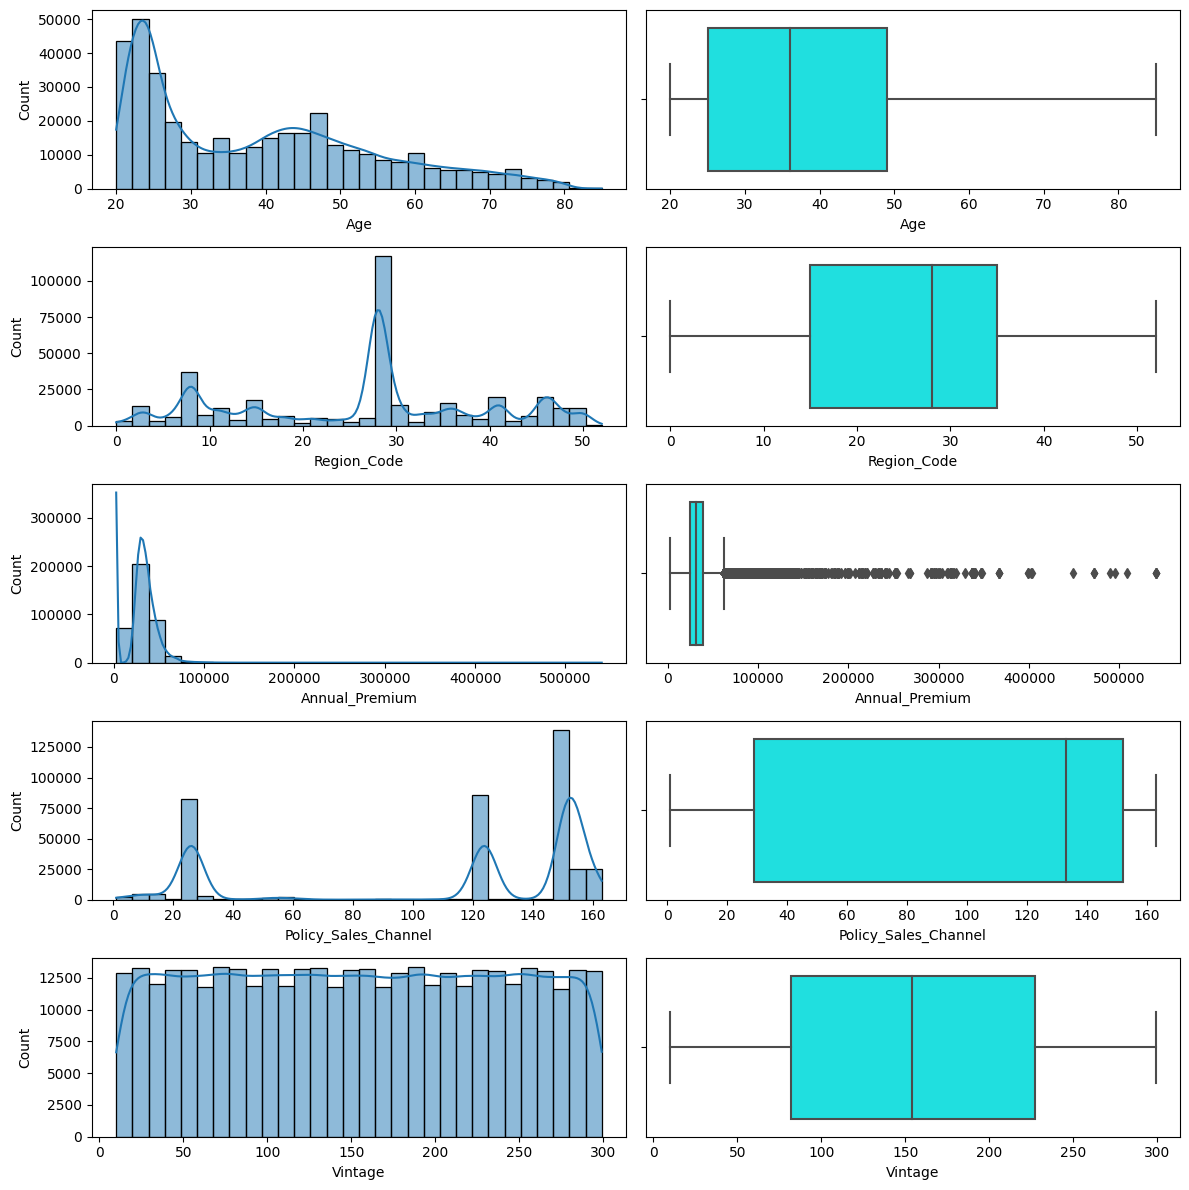

In [18]:
# Chart - 1 visualization code
#set up subplots grid
fig,axs = plt.subplots(nrows=5,ncols=2,figsize=(12,12))
#Loop over numerical feature dataframe 
for i,col in enumerate(dataset[numerical_feature].columns):
  #Determine the subplots index for this column
  row_index= i%5
  column_index=i//5
  #create histogram and boxplot
  sns.histplot(x=col,data=dataset[numerical_feature],ax=axs[row_index,column_index],kde=True,bins=30)
  sns.boxplot(x=col,data=dataset,ax=axs[row_index,column_index+1],color='cyan')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


* **Annual Premium have outliers.**
* **Vintage column has a uniform distribution meaning customers in the dataset have been associated with the company for roughly the same amount of time on average.**
* **Dataset contains customers which has age mostly between 20-30 years.**


#### Chart - 2

In [19]:
#Defining Pairplot feature
paiplot_feature=pd.concat([dataset[numerical_feature],dataset['Response']],axis=1)

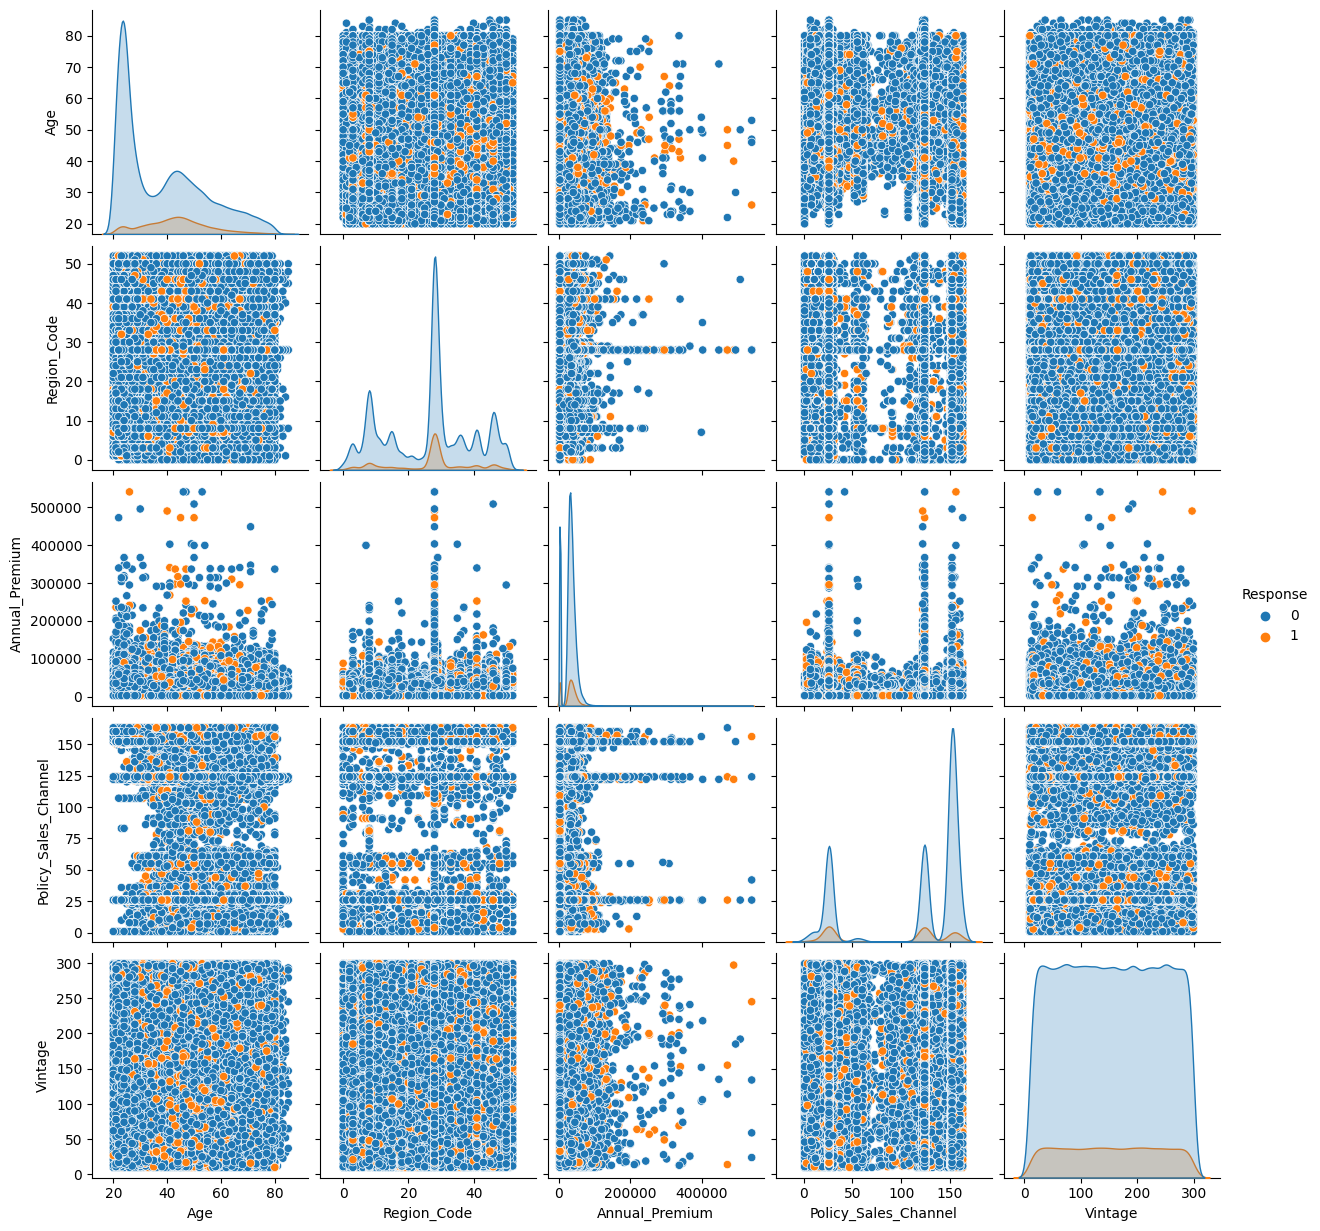

In [20]:
# Chart - 2 visualization code
sns.pairplot(data=paiplot_feature,hue='Response',diag_kind='kde')

* **Count for taking a vehicle insurance for each category is less.**
* **Middle age people are adopting vehicle Insurance**
* **Young consumers are not adopting the vehicle insurance, these consumers have highest reponse of 0.**
* **Specific region have highest number of consumers in which both types of consumer are present which are accepting and rejecting the vehicle insurance. Although the count of accepting the insurance is also very low.**
* **Mostly count of accepting the vechicle insurance is low.** 

#### Chart - 3

In [21]:
# Chart - 3 visualization code
sns.heatmap(dataset[numerical_feature].corr(),annot=True, cmap='coolwarm')

<Axes: >

* **Policy_sales_Chanel has collinearity with age.**
* **Let's try to convert the Policy sales Channel to categorical column.**


In [22]:
# Policy sales channel value counts
dataset['Policy_Sales_Channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

**Let's make 4 channels for policy sales channel.**
* **(0-40)-Channel A**
* **(40-80)-Channel B**
* **(80-120)-Channel C**
* **(120-160)Channel D**

In [23]:
# Define a function to group policy sales channels into four channels
def sales_channel_group(channel):
    if channel >= 0 and channel < 40:
        return 'Channel A'
    elif channel >= 40 and channel < 80:
        return 'Channel B'
    elif channel >= 80 and channel < 120:
        return 'Channel C'
    elif channel >= 120 and channel <= 160:
        return 'Channel D'

In [24]:
# Apply the function to the 'Policy_Sales_Channel' column and create a new column
dataset['Sales_Channel_Group'] = dataset['Policy_Sales_Channel'].apply(sales_channel_group)

In [25]:
#droping Policy_Sales_Channel
datset=dataset.drop('Policy_Sales_Channel',axis=1)

In [26]:
#Removing policy channel from numerical feature
numerical_feature.remove('Policy_Sales_Channel')

In [27]:
# adding column to categorical feature
categorical_feature.append('Sales_Channel_Group')

#### Chart - 4

In [28]:
#Value counts of sales channel group
dataset['Sales_Channel_Group'].value_counts()

Channel D    273985
Channel A     98391
Channel B      4441
Channel C      1399
Name: Sales_Channel_Group, dtype: int64

* **Channel B and C has low value counts let's collabrate these 2 channel in A only.**


In [29]:
def combine_channel(channel):
    if channel in ['Channel A', 'Channel B', 'Channel C']:
        return 'Channel A'
    else:
        return 'Channel D'
# Apply the function to the 'Policy_Sales_Channel' column and create a new column
dataset['Sales_Channel_Group'] = dataset['Sales_Channel_Group'].apply(combine_channel)


In [30]:
dataset=dataset.drop('Policy_Sales_Channel',axis=1)

In [31]:
#value count of new column
dataset['Sales_Channel_Group'].value_counts()

Channel D    276878
Channel A    104231
Name: Sales_Channel_Group, dtype: int64

In [32]:
#Ploting a countplot sales channel group
plt.figure(figsize=(15,8))
sns.countplot(x=dataset['Sales_Channel_Group'])

<Axes: xlabel='Sales_Channel_Group', ylabel='count'>

In [33]:
# Define a dictionary to map the response values to colors
pal = {1:"skyblue", 0:"magenta"}

# Set the plot style to "darkgrid" and the figure size to 15x8 inches
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))

# Create a count plot of the "Sales_Channel_Group" column, with the response values as the hue
ax = sns.countplot(x = "Sales_Channel_Group", 
                   hue="Response",
                   data = dataset, 
                   linewidth=4, 
                   palette = pal
)

# Get the legend and set the title to "Response"
leg = ax.get_legend()
leg.set_title("Response")

# Show the plot
plt.show()

* **Channels between 120-160(Channel D) has conviced more number customers to accept the vehicle insurance.**

**Categorical Columns**

---
#### Chart - 5
* **Gender**


In [34]:
dataset['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

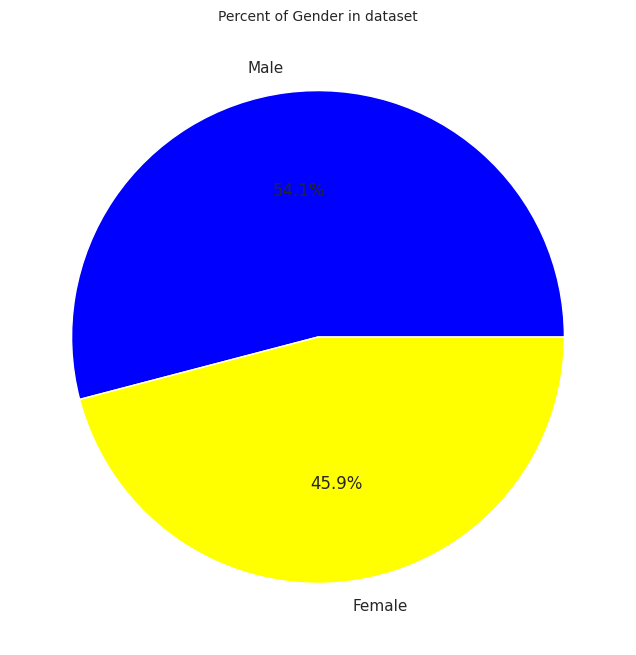

In [35]:
# Chart - 4 visualization code
# Set figure size
plt.figure(figsize=(15,8))

# Get labels and sizes for the pie chart
labels = dataset['Gender'].value_counts(sort = True).index
sizes = dataset['Gender'].value_counts(sort = True)

# Set colors for the pie chart
colors = ["Blue","Yellow"]

# Create and show the pie chart with percentage labels and a title
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)
plt.title('Percent of Gender in dataset',size = 10)
plt.show()

#### Chart - 6

In [36]:
# Define a dictionary to map the response values to colors
pal = {1:"green", 0:"gray"}

# Set the plot style to "darkgrid" and the figure size to 15x8 inches
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))

# Create a count plot of the "Gender" column, with the response values as the hue
ax = sns.countplot(x = "Gender", 
                   hue="Response",
                   data = dataset, 
                   linewidth=4, 
                   palette = pal
)

# Get the legend and set the title to "Response"
leg = ax.get_legend()
leg.set_title("Response")

# Show the plot
plt.show()


* **Ratio of Male and Female are 50-50**
* **Perctage of accepting the vehicle insurance for both male and female are somewhat of same.**

#### Chart - 7

---
* **Driving_License**


In [37]:
dataset['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

<Axes: xlabel='Driving_License', ylabel='count'>

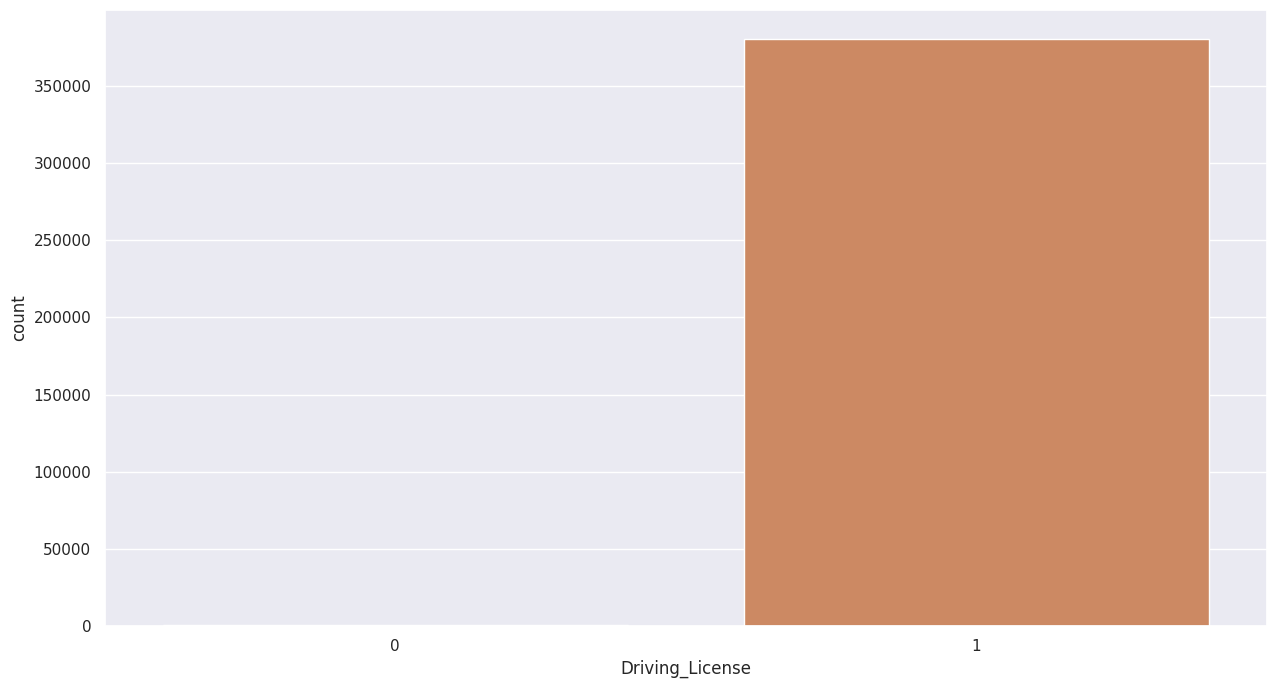

In [38]:
# Chart - 5 visualization code
plt.figure(figsize=(15,8))
sns.countplot(x=dataset['Driving_License'])

#### Chart - 8

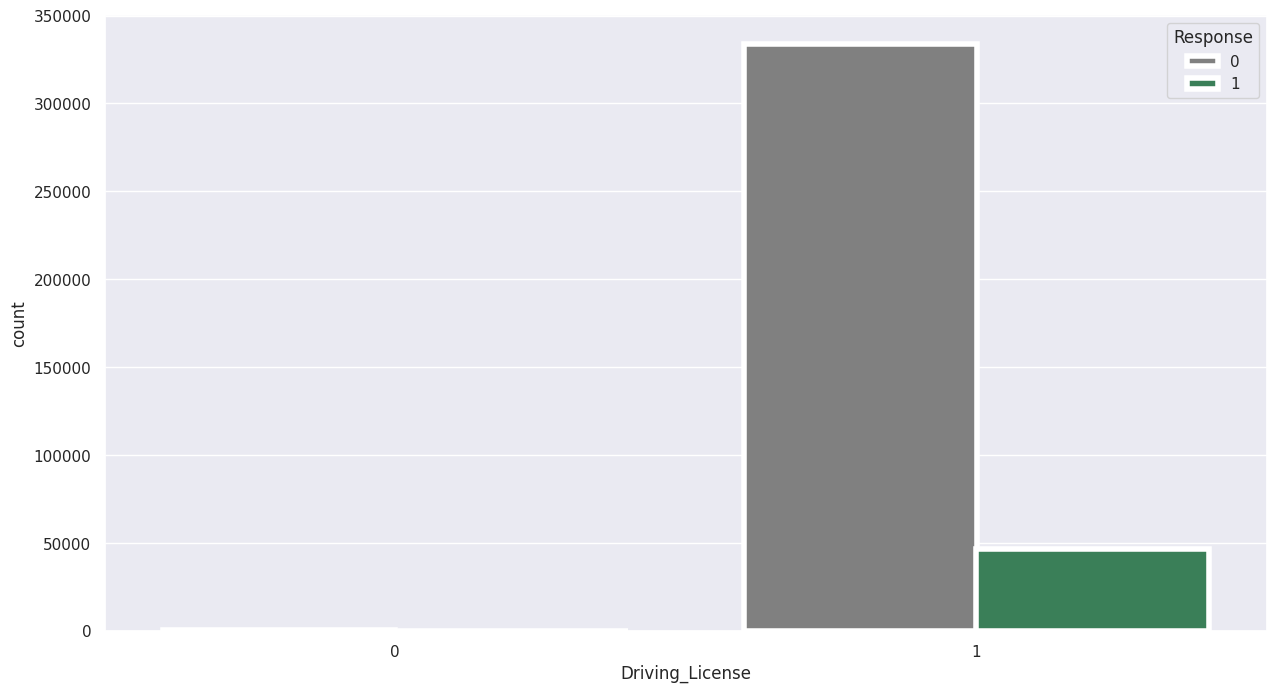

In [39]:
# Define a dictionary to map the response values to colors
pal = {1:"seagreen", 0:"gray"}

# Set the plot style to "darkgrid" and the figure size to 15x8 inches
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))

# Create a count plot of the "Driving_License" column, with the response values as the hue
ax = sns.countplot(x = "Driving_License", 
                   hue="Response",
                   data = dataset, 
                   linewidth=4, 
                   palette = pal
)

# Get the legend and set the title to "Response"
leg = ax.get_legend()
leg.set_title("Response")

# Show the plot
plt.show()


* **Mostly Customers have Driving License and few of them are adopting the insurance.**

#### Chart - 9

---

* **Previously_Insured**

In [40]:
dataset['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

<Axes: xlabel='Previously_Insured', ylabel='count'>

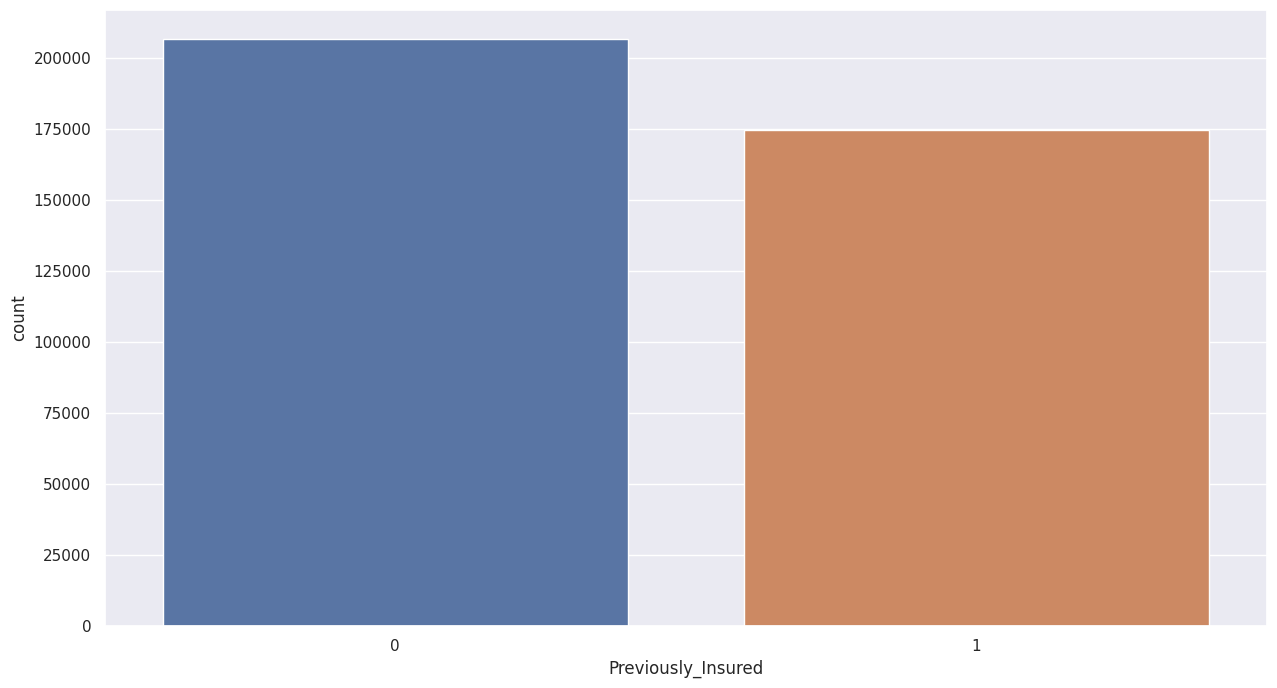

In [41]:
# Chart - 6 visualization code
plt.figure(figsize=(15,8))
sns.countplot(x=dataset['Previously_Insured'])

* **Both customers are present in dataset 1 representing customers which already have vehicle insurance and 0 representing customers which does not have insurance.**

#### Chart - 10

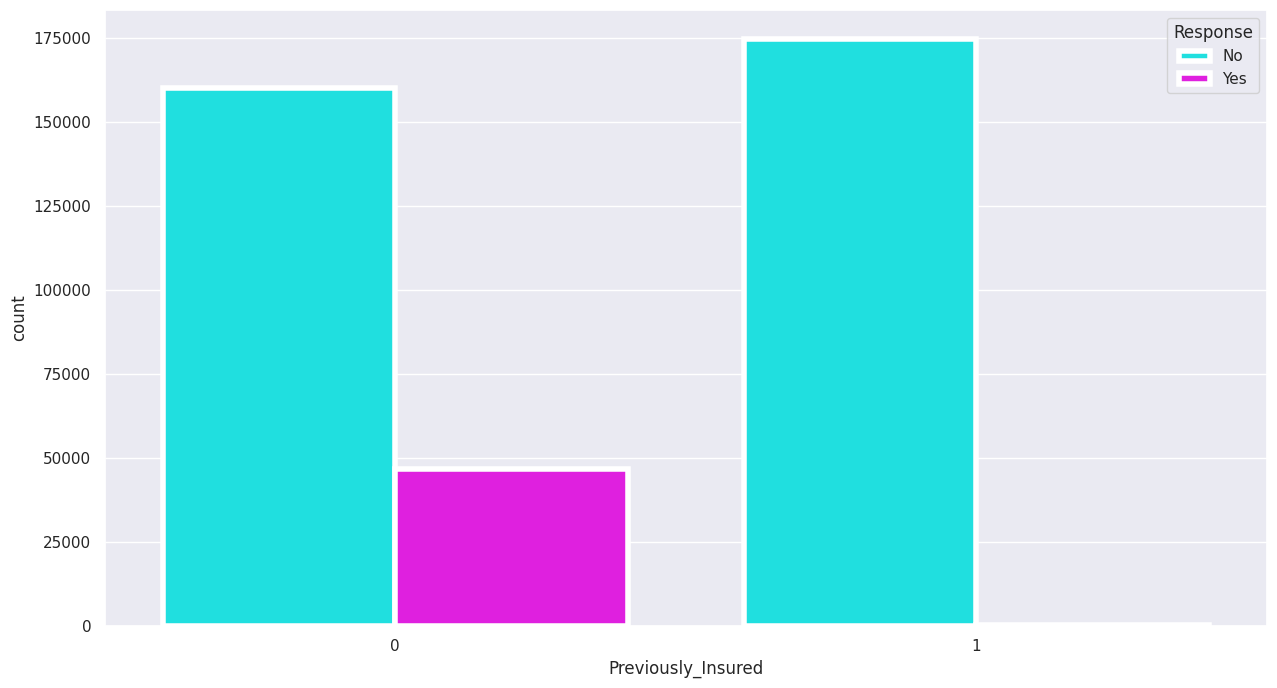

In [42]:
# Define a dictionary called 'pal' with keys 1 and 0, and values "magenta" and "cyan" respectively.
pal = {1:"magenta", 0:"cyan"}

# Set the plotting style to "darkgrid".
sns.set(style="darkgrid")

# Create a new figure with a size of 15x8 inches.
plt.subplots(figsize = (15,8))

# Create a count plot using Seaborn with the x-axis as the "Previously_Insured" column of the 'dataset' data, 
ax = sns.countplot(x = "Previously_Insured", 
                   hue="Response",
                   data = dataset, 
                   linewidth=4, 
                   palette = pal
)

# Get the legend object from the plot.
leg = ax.get_legend()

# Set the title of the legend to "Response".
leg.set_title("Response")

# Get the text objects in the legend and set them to "No" and "Yes" instead of "0" and "1".
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")

# Show the plot.
plt.show()


* **Mostly the insurance is adopted by those cutomers which have no insurance previously.**

#### Chart - 11

---
* **Vehicle_Age**


In [43]:
dataset['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

<Axes: xlabel='Vehicle_Age', ylabel='count'>

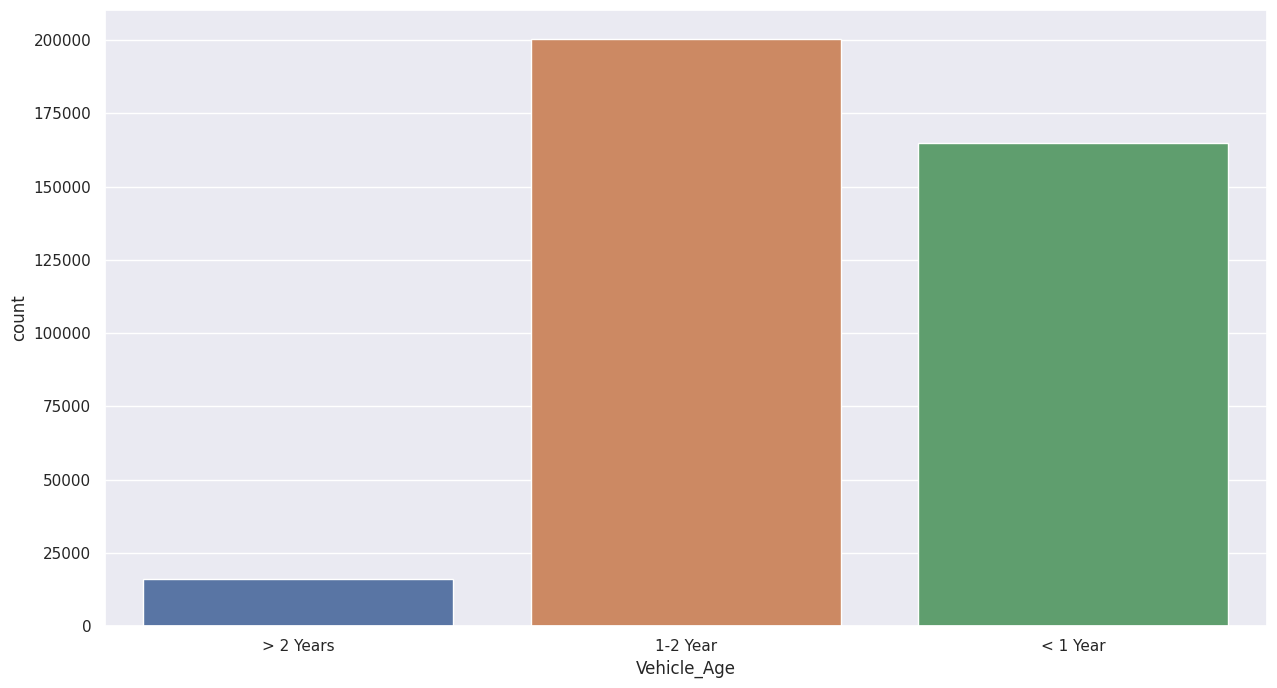

In [44]:
# Chart - 7 visualization code
plt.figure(figsize=(15,8))
sns.countplot(x=dataset['Vehicle_Age'])

* **Mostly the vehicles are new or age between 1-2 years.**

#### Chart - 12

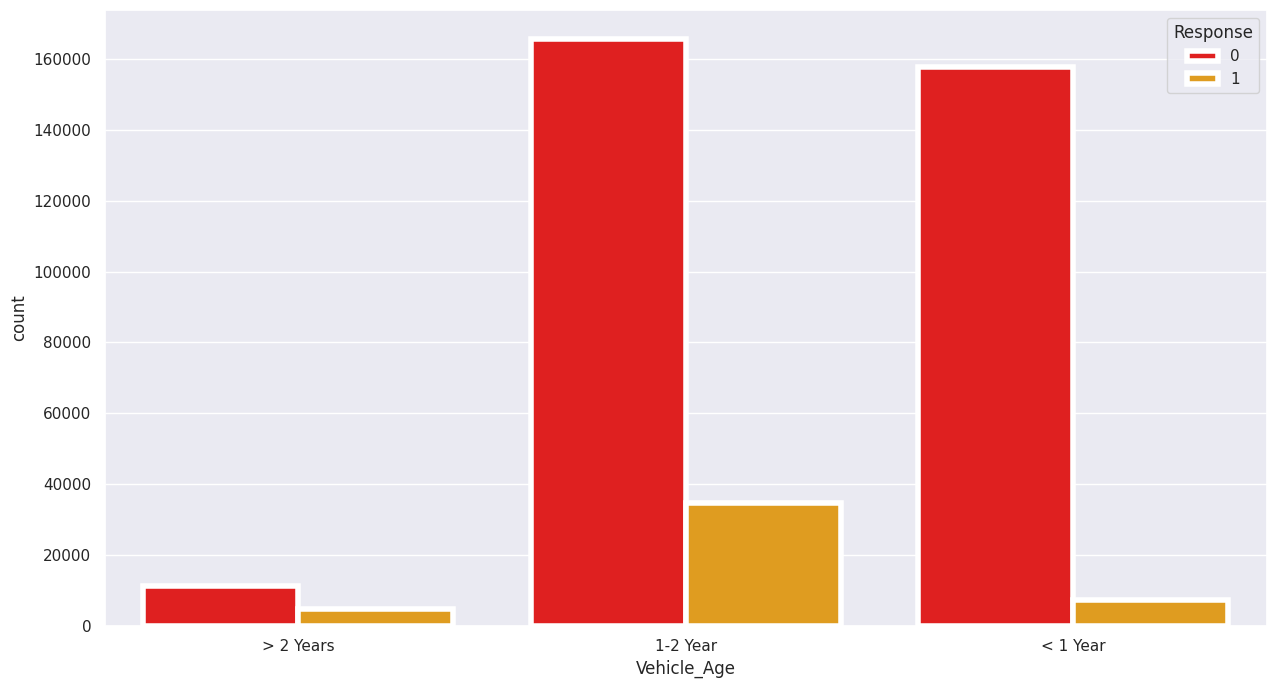

In [45]:
# Define a dictionary called 'pal' with keys 1 and 0, and values "orange" and "red" respectively.
pal = {1:"orange", 0:"red"}

# Set the plotting style to "darkgrid".
sns.set(style="darkgrid")

# Create a new figure with a size of 15x8 inches.
plt.subplots(figsize = (15,8))

# Create a count plot using Seaborn with the x-axis as the "Vehicle_Age" column of the 'dataset' data, 
ax = sns.countplot(x = "Vehicle_Age", 
                   hue="Response",
                   data = dataset, 
                   linewidth=4, 
                   palette = pal
)

# Get the legend object from the plot.
leg = ax.get_legend()

# Set the title of the legend to "Response".
leg.set_title("Response")

# Show the plot.
plt.show()


* **Insurance has taken by all type of vehicle age, But vehicle that has age between 1-2 years have taken most of the insurance.**
* **Although the bar of not taking the insurance(Red Plot) is still high in this case also.**

#### Chart - 13

---

* **Vehicle_Damage**

In [46]:
dataset['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [47]:
# Chart - 13 visualization code
plt.figure(figsize=(15,8))
sns.countplot(x=dataset['Vehicle_Damage'])

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

* **Proportion of customers are equal for having a vehicle damage or not**

#### Chart - 14

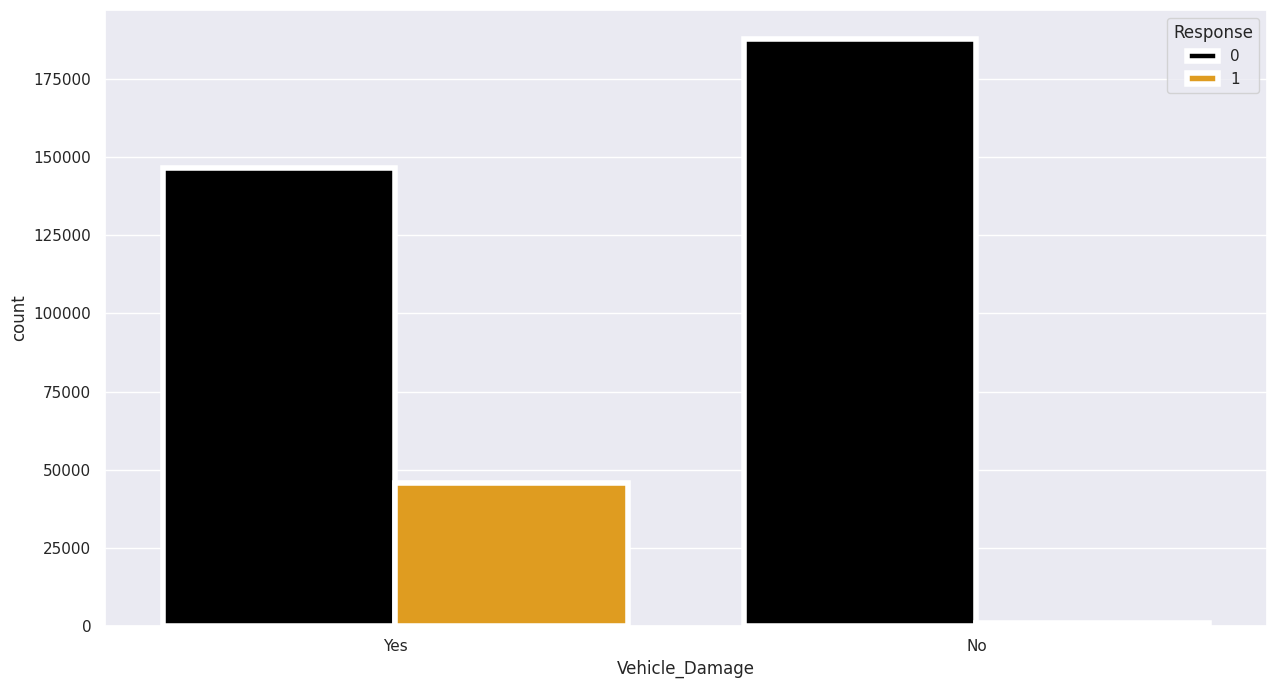

In [48]:
# Define a dictionary called 'pal' with keys 1 and 0, and values "orange" and "black" respectively.
pal = {1:"orange", 0:"black"}

# Set the plotting style to "darkgrid".
sns.set(style="darkgrid")

# Create a new figure with a size of 15x8 inches.
plt.subplots(figsize = (15,8))

# Create a count plot using Seaborn with the x-axis as the "Vehicle_Damage" column of the 'dataset' data, 
ax = sns.countplot(x = "Vehicle_Damage", 
                   hue="Response",
                   data = dataset, 
                   linewidth=4, 
                   palette = pal
)

# Get the legend object from the plot.
leg = ax.get_legend()

# Set the title of the legend to "Response".
leg.set_title("Response")

# Show the plot.
plt.show()


* **We can clearly see that customers which have already damaged their vehcile are more likely to adopt the vehicle insurance.**

#### Chart - 15

---
* **Response(Target Variable)**


In [49]:
dataset['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

<Axes: xlabel='Response', ylabel='count'>

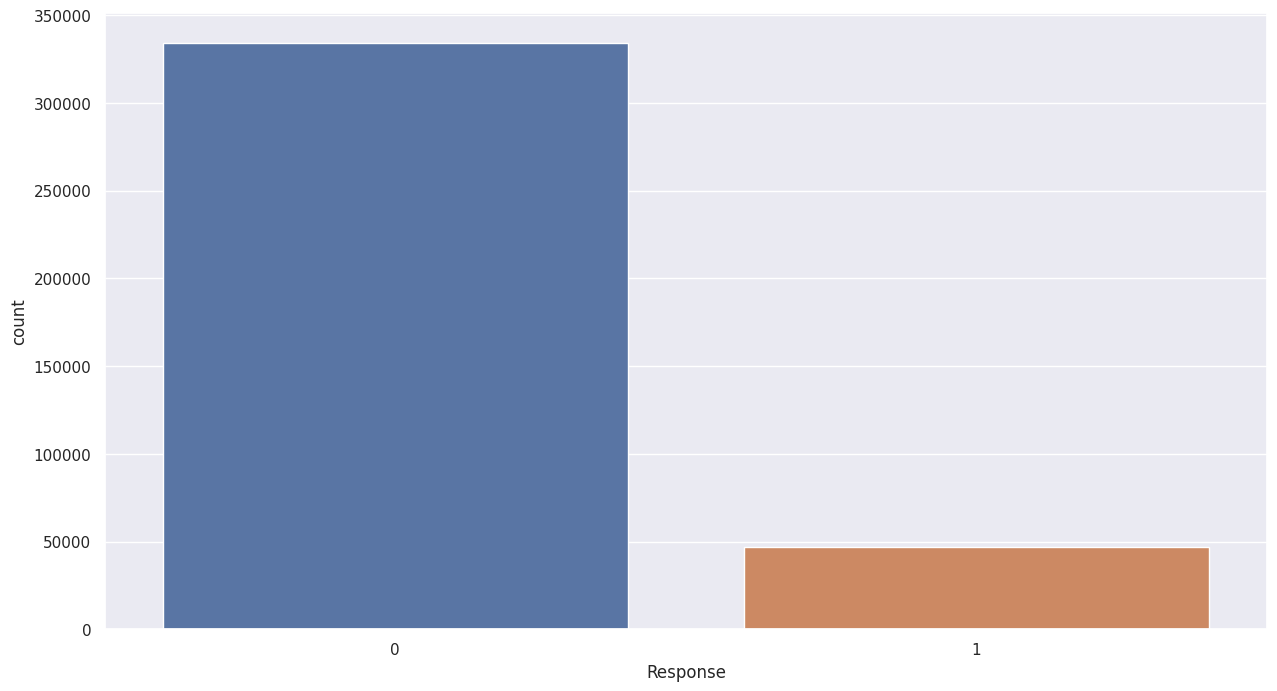

In [50]:
# Chart - 9 visualization code
plt.figure(figsize=(15,8))
sns.countplot(x=dataset['Response'])

* **We Can see Very less customers in our dataset are adopting the vehicle insurance.**
* **Results also inducates an imbalance dataset.**
* **We have to use some Oversampling technique to deal with Imbalance dataset.**

#### Chart - 16

In [51]:
# Chart - 10 visualization code
#set up subplots grid
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
#Loop over numerical feature dataframe and create a 
for i,col in enumerate(dataset[numerical_feature].columns):
  #Determine the subplots index for this column
  row_index= i%2
  column_index=i//2
  # Create a strip plot for the current variable using Seaborn
  sns.stripplot(x='Gender',y=col, hue='Response', data=dataset, palette='rocket', ax=axs[row_index, column_index])
# Adjust the layout and show the plot
plt.tight_layout()
plt.show()





* **Proportion of male and female are same .**
* **Dataset contain customers which are present between 20-85 for both male and female.**
* **In both categories there are customers which are paying high and low annual premium.**
* **Females are willing to pay high annual premium for vehicle insurance.**

#### Chart - 17

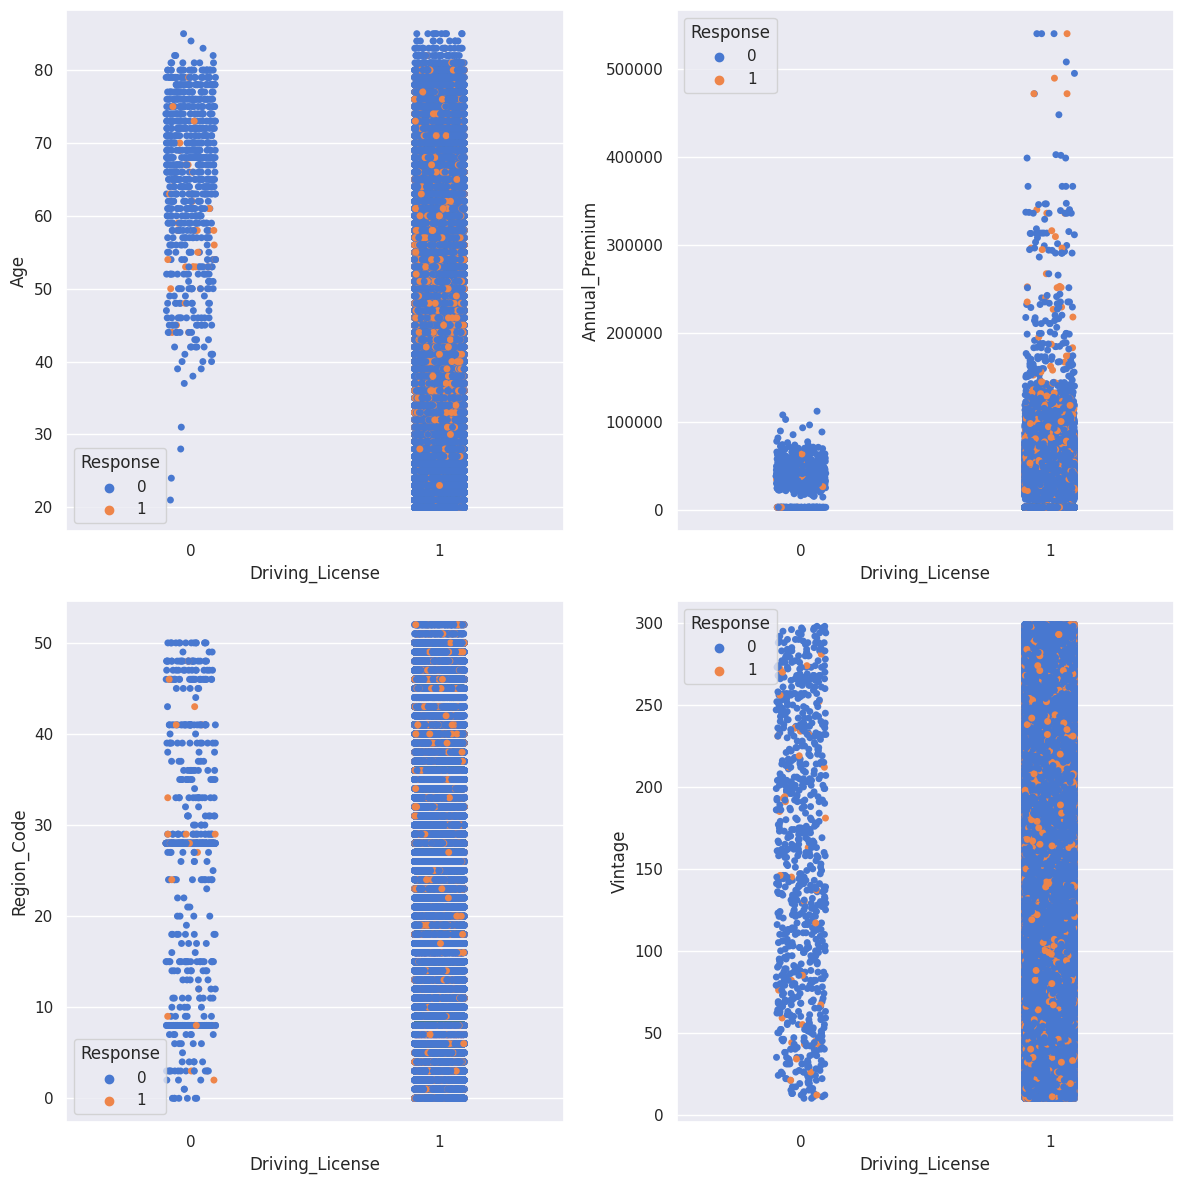

In [52]:
# Chart - 17 visualization code
#set up subplots grid
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
#Loop over numerical feature dataframe and create a 
for i,col in enumerate(dataset[numerical_feature].columns):
  #Determine the subplots index for this column
  row_index= i%2
  column_index=i//2
  # Create a strip plot for the current variable using Seaborn
  sns.stripplot(x='Driving_License',y=col, hue='Response', data=dataset, palette='muted', ax=axs[row_index, column_index])
# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

* **Mostly Young customers does not have driving License and they are too in some regions in which company is targeting.**
* **Some Customers which does not have driving license are accepting the vehicle insurance but at low annual premium.** 

#### Chart - 18

In [53]:
# Chart - 18 visualization code
#set up subplots grid
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
#Loop over numerical feature dataframe and create a 
for i,col in enumerate(dataset[numerical_feature].columns):
  #Determine the subplots index for this column
  row_index= i%2
  column_index=i//2
  # Create a strip plot for the current variable using Seaborn
  sns.stripplot(x='Previously_Insured',y=col, hue='Response', data=dataset, palette='husl', ax=axs[row_index, column_index])
# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

* **Customers which have not vehicle insurance previously are adopting the insurance at high annual premium too, These are the customers which we have to target more.**

#### Chart - 19

<ipython-input-54-2bca669fa04b>:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


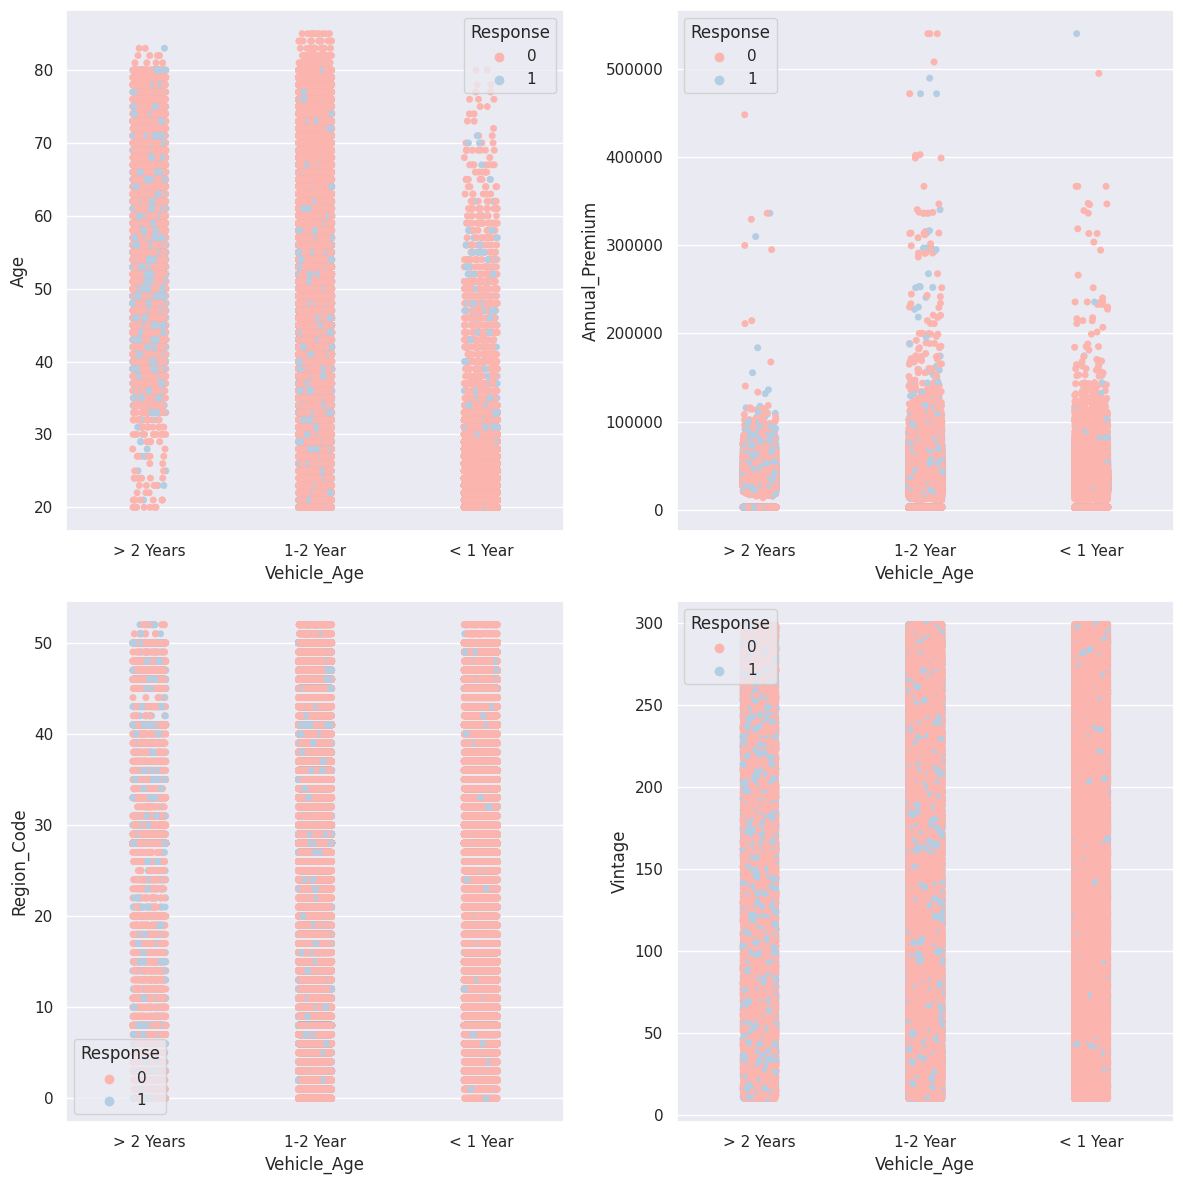

In [54]:
# Chart - 13 visualization code
#set up subplots grid
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
#Loop over numerical feature dataframe and create a 
for i,col in enumerate(dataset[numerical_feature].columns):
  #Determine the subplots index for this column
  row_index= i%2
  column_index=i//2
  # Create a strip plot for the current variable using Seaborn
  sns.stripplot(x='Vehicle_Age',y=col, hue='Response', data=dataset, palette='Pastel1', ax=axs[row_index, column_index])
# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

* **Customers which has new vehicle are willing pay high annual premium for vehicle insurance.**

#### Chart - 20

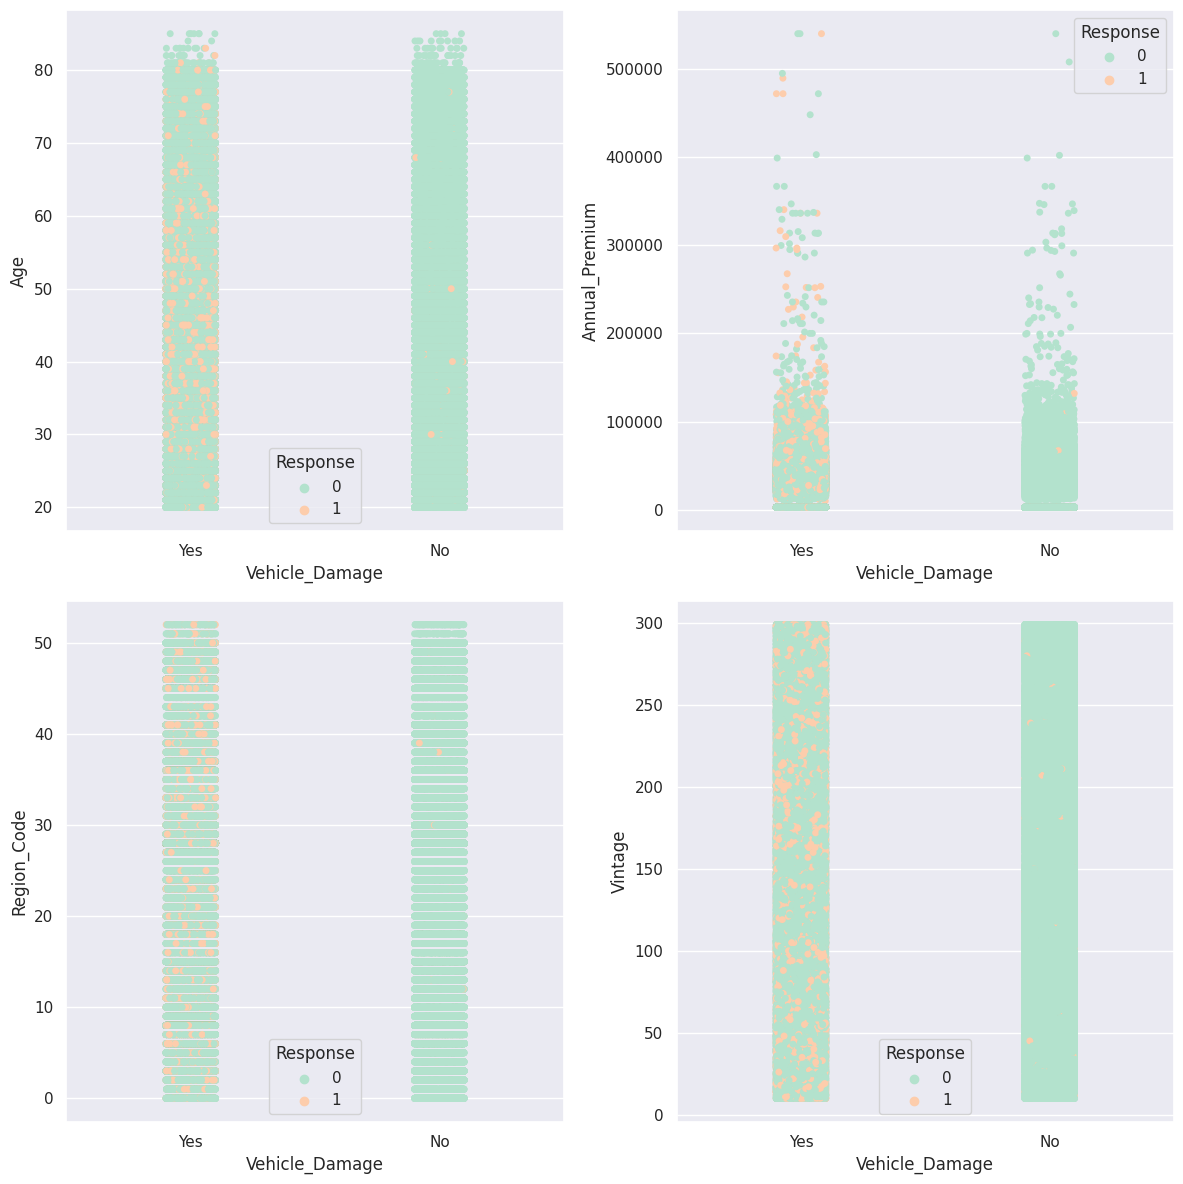

In [55]:
# Chart - 13 visualization code
#set up subplots grid
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
#Loop over numerical feature dataframe and create a 
for i,col in enumerate(dataset[numerical_feature].columns):
  #Determine the subplots index for this column
  row_index= i%2
  column_index=i//2
  # Create a strip plot for the current variable using Seaborn
  sns.stripplot(x='Vehicle_Damage',y=col, hue='Response', data=dataset, palette='Pastel2', ax=axs[row_index, column_index])
# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

* **In this case too customers whose vehicle was damaged earlier are more likely to adopt the insurance and adopting the insurance at high annual premium too.**

---

* **We can see in most of the cases annual premium have some relation with all categorical variables in some way**
* **Proportion of male and female are same**
* **We did not see any strong patterns of vintage column with categorical or numerical feature**

## ***Hypothesis Testing***

* **Feature Selection through Hypothesis Testing.**
* **Taking significance value(p-value)=0.05 or confidence interval to be 95%**

###a) For Categorical Variables
* **For all categorical variables i am using Chi2 method to see whether my categorical variables have significant relationship with my target variable.**
* **Using ch2 becuase this method used to find correlation between two categorical variables.**

### Hypothetical Statement - 1

#### 1. Stating my research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant relationship between having a Gender and the adopting vechicle insurance.

Alternative hypothesis: There is a significant relationship between having a Gender and adopting vechicle insurance.

#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value
# Create the contingency table using pd.crosstab
contingency_table1 = pd.crosstab(dataset['Gender'],dataset['Response'])

In [57]:
contingency_table1

Response       0      1
Gender                 
Female    156835  18185
Male      177564  28525

In [58]:
# Perform the chi-squared test
stat, p, dof, _ = chi2_contingency(contingency_table1)
print(f'Chi2_statstics : {stat}')
print(f'p-value: {p}')
if p>0.05:
  print('There is no significant relationship between having a Gender and the adopting vechicle insurance')
else:
  print('There is a significant relationship between having a Gender and adopting vechicle insurance')  

Chi2_statstics : 1047.7077577887574
p-value: 7.665800628415621e-230
There is a significant relationship between having a Gender and adopting vechicle insurance


### Hypothetical Statement - 2

#### 1. Stating my research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant relationship between having a Driving_License and the adopting vechicle insurance.

Alternative hypothesis: There is a significant relationship between having a Driving_License and adopting vechicle insurance.

In [59]:
# Perform Statistical Test to obtain P-Value
# Create the contingency table using pd.crosstab
contingency_table2 = pd.crosstab(dataset['Driving_License'],dataset['Response'])

In [60]:
contingency_table2

Response              0      1
Driving_License               
0                   771     41
1                333628  46669

In [61]:
# Perform the chi-squared test
stat, p, dof, _ = chi2_contingency(contingency_table2)
print(f'Chi2_statstics : {stat}')
print(f'p-value: {p}')
if p>0.05:
  print('There is no significant relationship between having a Driving_License and the adopting vechicle insurance')
else:
  print('There is a significant relationship between having a Driving_License and adopting vechicle insurance') 

Chi2_statstics : 38.63411722321234
p-value: 5.111753504019177e-10
There is a significant relationship between having a Driving_License and adopting vechicle insurance


### Hypothetical Statement - 3

#### 1. Stating my research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant relationship between having a Previously_Insured and the adopting vechicle insurance.

Alternative hypothesis: There is a significant relationship between having a Previously_Insured and adopting vechicle insurance.

In [62]:
# Perform Statistical Test to obtain P-Value
# Create the contingency table using pd.crosstab
contingency_table3 = pd.crosstab(dataset['Previously_Insured'],dataset['Response'])

In [63]:
contingency_table3

Response                 0      1
Previously_Insured               
0                   159929  46552
1                   174470    158

In [64]:
# Perform the chi-squared test
stat, p, dof, _ = chi2_contingency(contingency_table3)
print(f'Chi2_statstics : {stat}')
print(f'p-value: {p}')
if p>0.05:
  print('There is no significant relationship between having a Previously_Insured and the adopting vechicle insurance')
else:
  print('There is a significant relationship between having a Previously_Insured and adopting vechicle insurance') 

Chi2_statstics : 44357.96472219977
p-value: 0.0
There is a significant relationship between having a Previously_Insured and adopting vechicle insurance


### Hypothetical Statement - 4

#### 1. Stating my research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant relationship between having a Vehicle_Age and the adopting vechicle insurance.

Alternative hypothesis: There is a significant relationship between having a Vehicle_Age and adopting vechicle insurance.

In [65]:
# Perform Statistical Test to obtain P-Value
# Create the contingency table using pd.crosstab
contingency_table4 = pd.crosstab(dataset['Vehicle_Age'],dataset['Response'])

In [66]:
contingency_table4

Response          0      1
Vehicle_Age               
1-2 Year     165510  34806
< 1 Year     157584   7202
> 2 Years     11305   4702

In [67]:
# Perform the chi-squared test
stat, p, dof, _ = chi2_contingency(contingency_table4)
print(f'Chi2_statstics : {stat}')
print(f'p-value: {p}')
if p>0.05:
  print('There is no significant relationship between having a  Vehicle_Age and the adopting vechicle insurance')
else:
  print('There is a significant relationship between having a  Vehicle_Age and adopting vechicle insurance') 

Chi2_statstics : 18771.889904151052
p-value: 0.0
There is a significant relationship between having a  Vehicle_Age and adopting vechicle insurance


### Hypothetical Statement - 5

#### 1. Stating my research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant relationship between having a Vehicle_Damage and the adopting vechicle insurance.

Alternative hypothesis: There is a significant relationship between having a Vehicle_Damage and adopting vechicle insurance.

In [68]:
# Perform Statistical Test to obtain P-Value
# Create the contingency table using pd.crosstab
contingency_table5 = pd.crosstab(dataset['Vehicle_Damage'],dataset['Response'])

In [69]:
contingency_table5

Response             0      1
Vehicle_Damage               
No              187714    982
Yes             146685  45728

In [70]:
# Perform the chi-squared test
stat, p, dof, _ = chi2_contingency(contingency_table5)
print(f'Chi2_statstics : {stat}')
print(f'p-value: {p}')
if p>0.05:
  print('There is no significant relationship between having a Vehicle_Damage and the adopting vechicle insurance')
else:
  print('There is a significant relationship between having a Vehicle_Damage and adopting vechicle insurance') 

Chi2_statstics : 47864.76180117493
p-value: 0.0
There is a significant relationship between having a Vehicle_Damage and adopting vechicle insurance


### Hypothetical Statement - 6

#### 1. Stating my research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant relationship between having a Sales_Channel_Group and the adopting vechicle insurance.

Alternative hypothesis: There is a significant relationship between having a Sales_Channel_Group and adopting vechicle insurance.

In [71]:
# Perform Statistical Test to obtain P-Value
# Create the contingency table using pd.crosstab
contingency_table6 = pd.crosstab(dataset['Sales_Channel_Group'],dataset['Response'])

In [72]:
contingency_table6

Response                  0      1
Sales_Channel_Group               
Channel A             85186  19045
Channel D            249213  27665

In [73]:
# Perform the chi-squared test
stat, p, dof, _ = chi2_contingency(contingency_table6)
print(f'Chi2_statstics : {stat}')
print(f'p-value: {p}')
if p>0.05:
  print('There is no significant relationship between having a Sales_Channel_Group and the adopting vechicle insurance')
else:
  print('There is a significant relationship between having a Sales_Channel_Group and adopting vechicle insurance') 

Chi2_statstics : 4826.883938255522
p-value: 0.0
There is a significant relationship between having a Sales_Channel_Group and adopting vechicle insurance


* **We can clearly see that our all categorical variables have significant relationship with our target variable because all our hypothesis tests reject null hypothesis and accept alternate hypothesis.**
* **Even our categorical column Sales_Channel_Group which we convert from numeric variable to categorical variable also shows significance with our target variable.** 

###b) For Numerical Variables.
* **For all Numerical variables i am using Annova and T-Test method to see whether my numerical variables have significant difference in the mean values between the two groups defined by our target variable**
* **Using Annova and T-test becuase this method used to find correlation between Numericalvariable and categorical variables.** 

### Hypothetical Statement - 7

#### 1. Stating my research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): There is no significant difference in the mean values of the Age variable between the two groups defined by the "Response" variable.

Alternative hypothesis (Ha): There is a significant difference in the mean values of the Age variable between the two groups defined by the "Response" variable.

In [74]:
# Split data into two groups based on binary target variable (response)
group1 = dataset[dataset['Response']==0].loc[:,'Age']
group2 = dataset[dataset['Response']==1].loc[:,'Age']

####Performing Annova statistical test.

In [75]:
# Perform Statistical Test to obtain P-Value
 # Perform ANOVA
stat, p = f_oneway(group1, group2)
print(f'ANOVA statstics : {stat}')
print(f'p-value: {p}')

# Interpret results
if p > 0.05:
    print("There is no significant difference in mean Age values between the groups.")
else:
    print("There is a significant difference in mean Age values between the groups.")

ANOVA statstics : 4766.944791146631
p-value: 0.0
There is a significant difference in mean Age values between the groups.


### Hypothetical Statement -8

#### 1. Stating my research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): There is no significant difference in the mean values of the Region_Code variable between the two groups defined by the "Response" variable.

Alternative hypothesis (Ha): There is a significant difference in the mean values of the Region_Code variable between the two groups defined by the "Response" variable.

In [76]:
# Split data into two groups based on binary target variable (response)
group1 = dataset[dataset['Response']==0].loc[:,'Region_Code']
group2 = dataset[dataset['Response']==1].loc[:,'Region_Code']

####Performing T-Test statistical test.

In [77]:
# Perform Statistical Test to obtain P-Value
 # Perform t-test
stat, p = ttest_ind(group1, group2)
print(f't-test statstics : {stat}')
print(f'p-value: {p}')

# Interpret results
if p > 0.05:
    print("There is no significant difference in mean Region_Code values between the groups.")
else:
    print("There is a significant difference in mean Region_Code values between the groups.")

t-test statstics : -6.52554485414609
p-value: 6.783916512057903e-11
There is a significant difference in mean Region_Code values between the groups.


### Hypothetical Statement -8

1. Stating my research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): There is no significant difference in the mean values of the Annual_Premium variable between the two groups defined by the "Response" variable.

Alternative hypothesis (Ha): There is a significant difference in the mean values of the Annual_Premium variable between the two groups defined by the "Response" variable.

In [78]:
# Split data into two groups based on binary target variable (response)
group1 = dataset[dataset['Response']==0].loc[:,'Annual_Premium']
group2 = dataset[dataset['Response']==1].loc[:,'Annual_Premium']

Performing Annova statistical test.

In [79]:
# Perform Statistical Test to obtain P-Value
 # Perform ANOVA
stat, p = f_oneway(group1, group2)
print(f'ANOVA statstics : {stat}')
print(f'p-value: {p}')

# Interpret results
if p > 0.05:
    print("There is no significant difference in mean Annual_Premium values between the groups.")
else:
    print("There is a significant difference in mean Annual_Premium values between the groups.")

ANOVA statstics : 194.31758736617786
p-value: 3.722315140370128e-44
There is a significant difference in mean Annual_Premium values between the groups.


Hypothetical Statement -8

1. Stating my research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): There is no significant difference in the mean values of the Vintage variable between the two groups defined by the "Response" variable.

Alternative hypothesis (Ha): There is a significant difference in the mean values of the Vintage variable between the two groups defined by the "Response" variable.

In [80]:
# Split data into two groups based on binary target variable (response)
group1 = dataset[dataset['Response']==0].loc[:,'Vintage']
group2 = dataset[dataset['Response']==1].loc[:,'Vintage']

Performing Annova statistical test.

In [81]:
# Perform Statistical Test to obtain P-Value
 # Perform ANOVA
stat, p = f_oneway(group1, group2)
print(f'ANOVA statstics : {stat}')
print(f'p-value: {p}')

# Interpret results
if p > 0.05:
    print("There is no significant difference in mean Vintage values between the groups.")
else:
    print("There is a significant difference in mean Vintage values between the groups.")

ANOVA statstics : 0.42046870651590845
p-value: 0.5167036522730712
There is no significant difference in mean Vintage values between the groups.


* **The results shows that our all numerical variable have significant difference in the mean values between the two groups defined by our target variable except Vintage column.**
* **Dropping the Vintage column from our analysis might be a reasonable approach.**

In [82]:
#Droping the vintage column
dataset=dataset.drop('Vintage',axis=1)

In [83]:
#Adjusting our numerical feature
numerical_feature.remove('Vintage')

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

In [84]:
# Handling Outliers & Outlier treatments
# Replace outliers in Annual_Premium column
q1_premium = dataset['Annual_Premium'].quantile(0.25)
q3_premium = dataset['Annual_Premium'].quantile(0.75)
iqr_premium = q3_premium - q1_premium
upper_bound_premium = q3_premium + 1.5*iqr_premium
lower_bound_premium = q1_premium - 1.5*iqr_premium

In [85]:
# Initialize an empty list
lst=[]

# Iterate through the values in the 'Annual_Premium' column of the dataset
for i in dataset['Annual_Premium'].tolist():
  
  # If the value is greater than the upper bound for Annual_Premium, set it to the upper bound and append it to the list
  if i > upper_bound_premium:
    i = upper_bound_premium
    lst.append(i)
    
  # If the value is less than the lower bound for Annual_Premium, set it to the lower bound and append it to the list
  elif i < lower_bound_premium:
    i = lower_bound_premium
    lst.append(i)
    
  # Otherwise, append the original value to the list
  else:
    lst.append(i)


In [86]:
#Treating annual premium
dataset['Annual_Premium']=lst

<Axes: xlabel='Annual_Premium'>

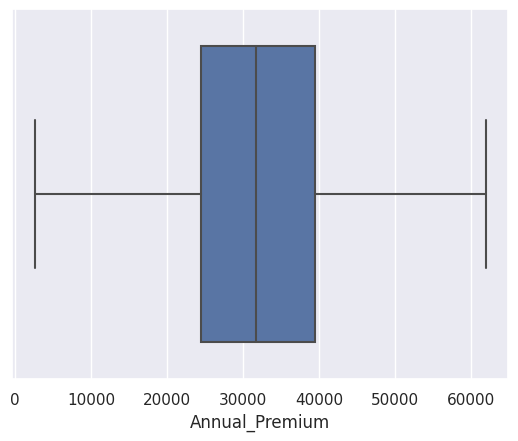

In [87]:
#Plotting boxplot of treated annual premium
sns.boxplot(x=dataset['Annual_Premium'])

### 3. Categorical Encoding

In [88]:
# Encode your categorical columns
# apply one-hot encoding on the gender column
gender_dummies = pd.get_dummies(dataset['Gender'], prefix='gender')

# concatenate the one-hot encoded variables with the original dataframe
dataset = pd.concat([dataset, gender_dummies], axis=1)

# drop the original gender column
dataset.drop(['Gender'], axis=1, inplace=True)

In [89]:
#Updating Categorical feature
categorical_feature.remove('Gender')
categorical_feature.append('gender_Female')
categorical_feature.append('gender_Male')

In [90]:
# apply one-hot encoding on the Vehicle_Age column
dataset['Vehicle_Age']=dataset['Vehicle_Age'].apply(lambda x: 1 if x == '< 1 Year' else 2 if x == '1-2 Year' else 3)


In [91]:
# apply one-hot encoding on the Vehicle_Damage column
dataset['Vehicle_Damage'] = dataset['Vehicle_Damage'].apply(lambda x: 0 if x == 'No' else 1)


In [92]:
## apply one-hot encoding on the Sales_Channel_Group column
dataset['Sales_Channel_Group']=dataset['Sales_Channel_Group'].apply(lambda x: 1 if x == 'Channel A' else 2)

In [93]:
dataset

Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0        44                1         28.0                   0            3   
1        76                1          3.0                   0            2   
2        47                1         28.0                   0            3   
3        21                1         11.0                   1            1   
4        29                1         41.0                   1            1   
...     ...              ...          ...                 ...          ...   
381104   74                1         26.0                   1            2   
381105   30                1         37.0                   1            1   
381106   21                1         30.0                   1            1   
381107   68                1         14.0                   0            3   
381108   46                1         29.0                   0            2   

        Vehicle_Damage  Annual_Premium  Response  Sales_Channel_Group  \
0                    1         40454.0         1                    1   
1                    0         33536.0         0                    1   
2                    1         38294.0         1                    1   
3                    0         28619.0         0                    2   
4                    0         27496.0         0                    2   
...                ...             ...       ...                  ...   
381104               0         30170.0         0                    1   
381105               0         40016.0         0                    2   
381106               0         35118.0         0                    2   
381107               1         44617.0         0                    2   
381108               0         41777.0         0                    1   

        gender_Female  gender_Male  
0                   0            1  
1                   0            1  
2                   0            1  
3                   0            1  
4                   1            0  
...               ...          ...  
381104              0            1  
381105              0            1  
381106              0            1  
381107              1            0  
381108              0            1  

[381109 rows x 11 columns]

#### 2. Feature Selection

In [94]:
#making corelation table for numerical feature
dataset[numerical_feature].corr()

Age  Region_Code  Annual_Premium
Age             1.000000     0.042574        0.066876
Region_Code     0.042574     1.000000       -0.009714
Annual_Premium  0.066876    -0.009714        1.000000

<Axes: >

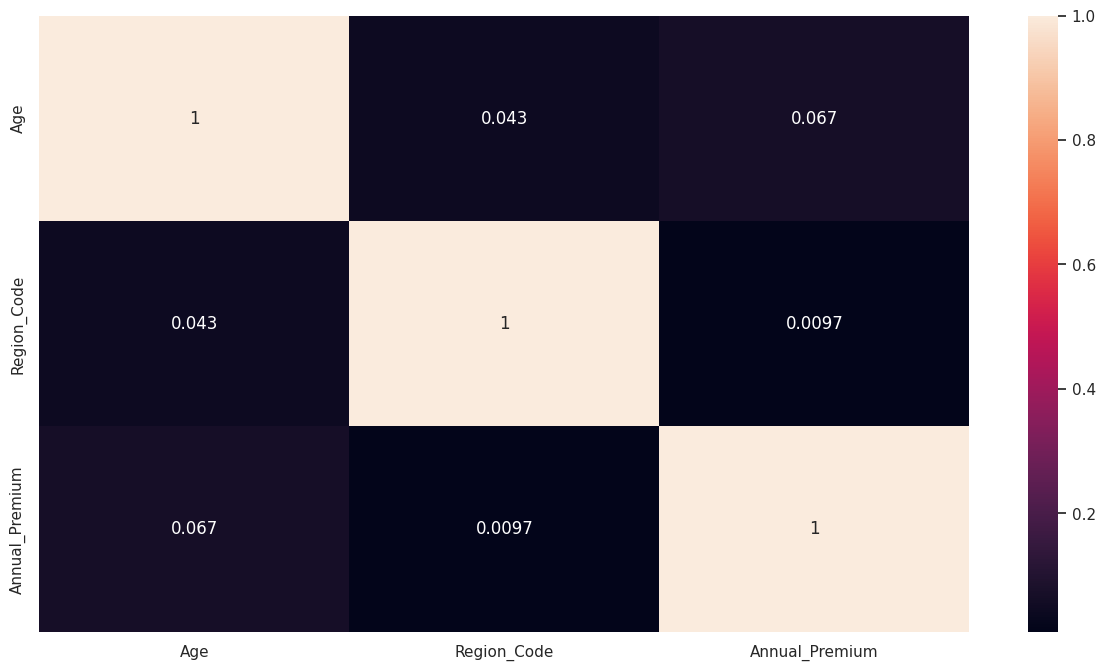

In [95]:
# Ploting corelation heatmap for numerical feature
plt.figure(figsize=(15,8))
sns.heatmap(abs(dataset[numerical_feature].corr()),annot=True)

* **Based on this correlation matrix alone, we can conclude that the variables are weakly correlated and that there is no strong relationship between Age, Region_Code, and Annual_Premium.**

In [96]:
#making corelation table for categorical feature
dataset[categorical_feature].corr()

Driving_License  Previously_Insured  Vehicle_Age  \
Driving_License             1.000000            0.014969    -0.037306   
Previously_Insured          0.014969            1.000000    -0.380873   
Vehicle_Age                -0.037306           -0.380873     1.000000   
Vehicle_Damage             -0.016622           -0.824143     0.396873   
Response                    0.010155           -0.341170     0.221874   
Sales_Channel_Group         0.039055            0.174683    -0.448347   
gender_Female               0.018374            0.081932    -0.160427   
gender_Male                -0.018374           -0.081932     0.160427   

                     Vehicle_Damage  Response  Sales_Channel_Group  \
Driving_License           -0.016622  0.010155             0.039055   
Previously_Insured        -0.824143 -0.341170             0.174683   
Vehicle_Age                0.396873  0.221874            -0.448347   
Vehicle_Damage             1.000000  0.354400            -0.181586   
Response                   0.354400  1.000000            -0.112549   
Sales_Channel_Group       -0.181586 -0.112549             1.000000   
gender_Female             -0.091606 -0.052440             0.087670   
gender_Male                0.091606  0.052440            -0.087670   

                     gender_Female  gender_Male  
Driving_License           0.018374    -0.018374  
Previously_Insured        0.081932    -0.081932  
Vehicle_Age              -0.160427     0.160427  
Vehicle_Damage           -0.091606     0.091606  
Response                 -0.052440     0.052440  
Sales_Channel_Group       0.087670    -0.087670  
gender_Female             1.000000    -1.000000  
gender_Male              -1.000000     1.000000

In [97]:
dataset[categorical_feature]

Driving_License  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0                     1                   0            3               1   
1                     1                   0            2               0   
2                     1                   0            3               1   
3                     1                   1            1               0   
4                     1                   1            1               0   
...                 ...                 ...          ...             ...   
381104                1                   1            2               0   
381105                1                   1            1               0   
381106                1                   1            1               0   
381107                1                   0            3               1   
381108                1                   0            2               0   

        Response  Sales_Channel_Group  gender_Female  gender_Male  
0              1                    1              0            1  
1              0                    1              0            1  
2              1                    1              0            1  
3              0                    2              0            1  
4              0                    2              1            0  
...          ...                  ...            ...          ...  
381104         0                    1              0            1  
381105         0                    2              0            1  
381106         0                    2              0            1  
381107         0                    2              1            0  
381108         0                    1              0            1  

[381109 rows x 8 columns]

In [98]:
 # Ploting corelation heatmap for categorical feature
plt.figure(figsize=(15,8))
sns.heatmap(abs(dataset[categorical_feature].corr()),annot=True,cmap='coolwarm')

<Axes: >

In [99]:
dataset_cat=dataset[categorical_feature]

In [100]:
#lets check vif scores
def calc_vif(x):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [101]:
ignore_features = ['gender_Female','gender_Male','Driving_License']
dataset_cat= dataset_cat[[col for col in  dataset_cat.columns if col not in ignore_features]]
calc_vif(dataset_cat)

variables       VIF
0   Previously_Insured  4.613340
1          Vehicle_Age  6.826378
2       Vehicle_Damage  5.743887
3             Response  1.324299
4  Sales_Channel_Group  7.673659

In [102]:
dataset=dataset.drop(['gender_Female','gender_Male','Driving_License'],axis=1)

In [103]:
dataset.shape

(381109, 8)

In [104]:
dataset.columns

Index(['Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Response', 'Sales_Channel_Group'],
      dtype='object')

### 8. Data Splitting

In [105]:
x=dataset.drop('Response',axis=1)
y=dataset['Response']

In [106]:
y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [107]:
x

Age  Region_Code  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0        44         28.0                   0            3               1   
1        76          3.0                   0            2               0   
2        47         28.0                   0            3               1   
3        21         11.0                   1            1               0   
4        29         41.0                   1            1               0   
...     ...          ...                 ...          ...             ...   
381104   74         26.0                   1            2               0   
381105   30         37.0                   1            1               0   
381106   21         30.0                   1            1               0   
381107   68         14.0                   0            3               1   
381108   46         29.0                   0            2               0   

        Annual_Premium  Sales_Channel_Group  
0              40454.0                    1  
1              33536.0                    1  
2              38294.0                    1  
3              28619.0                    2  
4              27496.0                    2  
...                ...                  ...  
381104         30170.0                    1  
381105         40016.0                    2  
381106         35118.0                    2  
381107         44617.0                    2  
381108         41777.0                    1  

[381109 rows x 7 columns]

In [108]:
# X is the feature matrix and y is the target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 6. Data Scaling

In [109]:
# Scaling your data
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
x_train = scaler.fit_transform(x_train)

# Transform the test data using the fitted scaler
x_test = scaler.transform(x_test)

### 9. Handling Imbalanced Dataset

In [110]:
dataset['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

* **We can clearly see that category 1(adopting insurance) is much less compared to category 0(Not adopting insurance), therefore our dataset is imbalance.** 

In [111]:
# Handling Imbalanced Dataset (If needed)
# Instantiate the SMOTE object
smote = SMOTE()

# Apply SMOTE to the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

The purpose of upsampling the training data is to address the class imbalance issue, where the minority class has very few instances compared to the majority class. By upsampling, the minority class instances are artificially increased to balance the two classes. This helps the logistic regression model to learn from both classes and make better predictions on the test data.

## ***7. ML Model Implementation***

### ML Model - 1

In [112]:
# ML Model - 1 Implementation
# Instantiate the logistic regression model
model = LogisticRegression()

# Train the model on the resampled training data
model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Make predictions on the train data
y_pred_train=model.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [113]:
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm_lr)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy_train_data: 0.6375280021778561
Accuracy_test_data: 0.6404712550182362
ROC AUC score: 0.7844428115390393
Confusion matrix:
[[39520 27179]
 [  225  9298]]
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.25      0.98      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



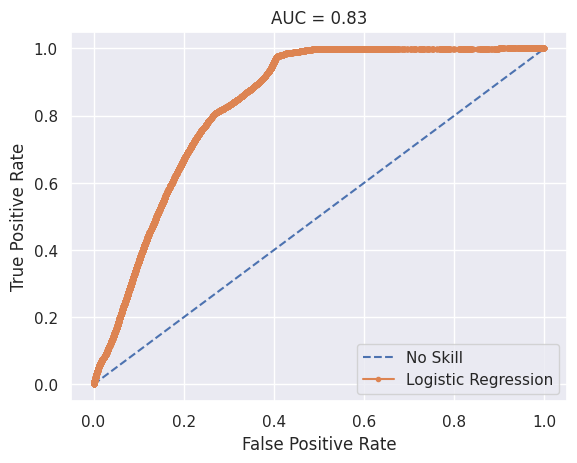

In [114]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = model.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [115]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid={'C':[0.1,5,10]}
grid_model=GridSearchCV(model,param_grid,scoring='roc_auc',cv=5)            
# Fit the Algorithm
grid_logreg=grid_model.fit(x_train_resampled,y_train_resampled)
# Make predictions on the test data
y_pred = grid_logreg.predict(x_test)
# Make predictions on the train data
y_pred_train=grid_logreg.predict(x_train)

In [116]:
# get the best score
best_score = grid_logreg.best_score_
print(f'best_score-{best_score}')

best_score-0.8300502597634019


In [117]:
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm_lr_cv = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm_lr_cv)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy_train_data: 0.6375280021778561
Accuracy_test_data: 0.6404712550182362
ROC AUC score: 0.7844428115390393
Confusion matrix:
[[39520 27179]
 [  225  9298]]
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.25      0.98      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



In [118]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = grid_logreg.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

### ML Model - 2

In [119]:
# ML Model - 2 Implementation
# Instantiate the Gaussian Naive Bayes model
model_2 = GaussianNB()
# Train the model on the resampled training data
model_2.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model_2.predict(x_test)

# Make predictions on the train data
y_pred_train=model_2.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [120]:
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)


Accuracy_train_data: 0.6375312820815581
Accuracy_test_data: 0.640458135446459
ROC AUC score: 0.78461534756924
Confusion matrix:
[[39515 27184]
 [  221  9302]]
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.25      0.98      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



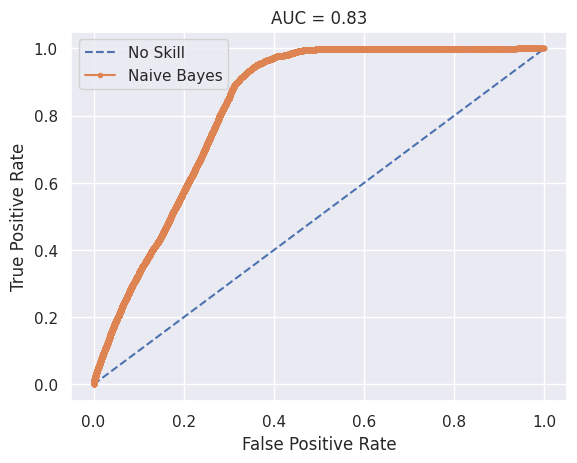

In [121]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = model_2.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [122]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid={'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_model2=GridSearchCV(model_2,param_grid,scoring='roc_auc',cv=5)
# Fit the Algorithm
grid_nb=grid_model2.fit(x_train_resampled,y_train_resampled)
# Make predictions on the test data
y_pred = grid_nb.predict(x_test)

# Make predictions on the train data
y_pred_train=grid_nb.predict(x_train)

In [123]:
# get the best score
best_score = grid_nb.best_score_
print(f'best_score-{best_score}')

best_score-0.8229311641288029


In [124]:
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm_nb = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm_nb)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy_train_data: 0.6375312820815581
Accuracy_test_data: 0.640458135446459
ROC AUC score: 0.78461534756924
Confusion matrix:
[[39515 27184]
 [  221  9302]]
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.25      0.98      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



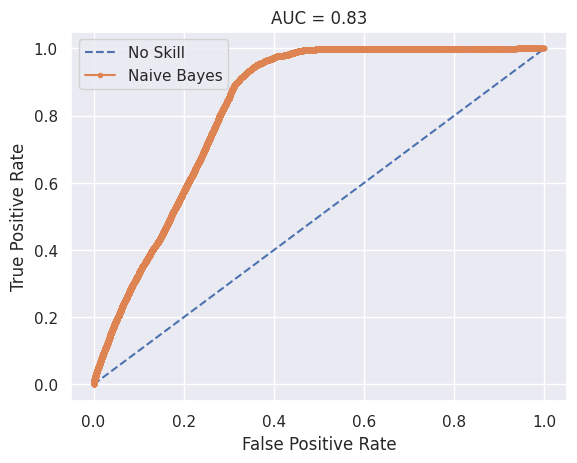

In [125]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = grid_nb.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

### ML Model - 3

In [126]:
# ML Model - 3 Implementation
# Instantiate the Decision Tree model
model_3 = DecisionTreeClassifier(random_state=42)
# Fit the Algorithm
# Train the model on the resampled training data
model_3.fit(x_train_resampled, y_train_resampled)
# Predict on the model
# Make predictions on the test data
y_pred = model_3.predict(x_test)

# Make predictions on the train data
y_pred_train=model_3.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [127]:
# Visualizing evaluation Metric Score chart

# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)


Accuracy_train_data: 0.9618612797528264
Accuracy_test_data: 0.7972238986119493
ROC AUC score: 0.6463134008589263
Confusion matrix:
[[56527 10172]
 [ 5284  4239]]
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     66699
           1       0.29      0.45      0.35      9523

    accuracy                           0.80     76222
   macro avg       0.60      0.65      0.62     76222
weighted avg       0.84      0.80      0.81     76222



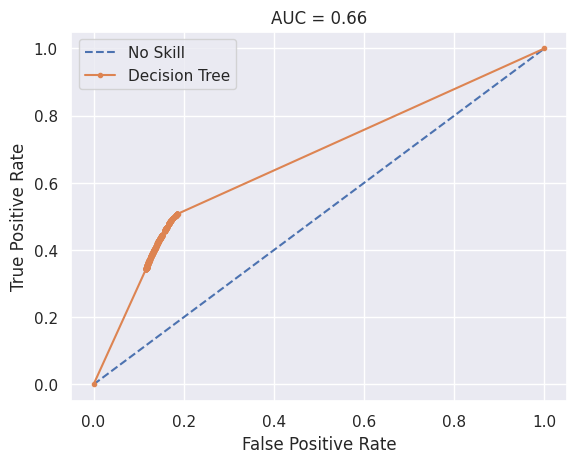

In [128]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = model_3.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

####Cross- Validation & Hyperparameter Tuning

In [129]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid={'criterion':['gini', 'entropy', 'log_loss'],
             'max_depth':[10,50,100,200]}
grid_model3=GridSearchCV(model_3,param_grid,scoring='roc_auc',cv=5)
# Fit the Algorithm
grid_dt=grid_model3.fit(x_train_resampled,y_train_resampled)
# Make predictions on the test data
y_pred = grid_dt.predict(x_test)

# Make predictions on the train data
y_pred_train=grid_dt.predict(x_train)

In [130]:
# get the best score
best_score = grid_dt.best_score_
print(f'best_score-{best_score}')

best_score-0.8801075586956724


In [131]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm_dt)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy_train_data: 0.9351300645813039
Accuracy_test_data: 0.7943769515363018
ROC AUC score: 0.6600344514418435
Confusion matrix:
[[55969 10730]
 [ 4943  4580]]
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88     66699
           1       0.30      0.48      0.37      9523

    accuracy                           0.79     76222
   macro avg       0.61      0.66      0.62     76222
weighted avg       0.84      0.79      0.81     76222



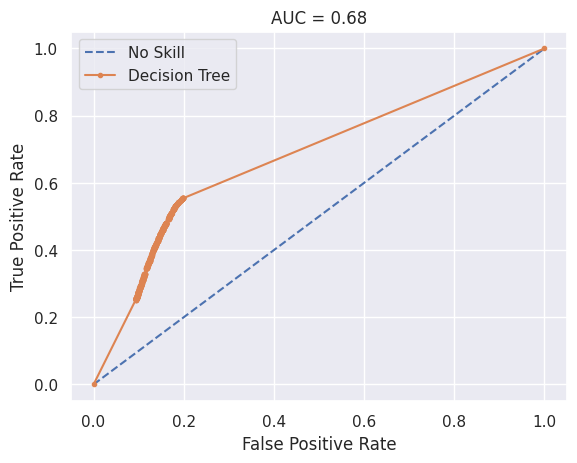

In [132]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = grid_dt.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

####ML Model-4

In [133]:
# ML Model - 4 Implementation
# Instantiate the BaggingClassifier model
model_4 = BaggingClassifier(base_estimator=model_3,random_state=42)
# Fit the Algorithm
# Train the model on the resampled training data
model_4.fit(x_train_resampled, y_train_resampled)
# Predict on the model
# Make predictions on the test data
y_pred = model_4.predict(x_test)

# Make predictions on the train data
y_pred_train=model_4.predict(x_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [134]:
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy_train_data: 0.9500733058477403
Accuracy_test_data: 0.8057516202671144
ROC AUC score: 0.6444798309363066
Confusion matrix:
[[57326  9373]
 [ 5433  4090]]
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     66699
           1       0.30      0.43      0.36      9523

    accuracy                           0.81     76222
   macro avg       0.61      0.64      0.62     76222
weighted avg       0.84      0.81      0.82     76222



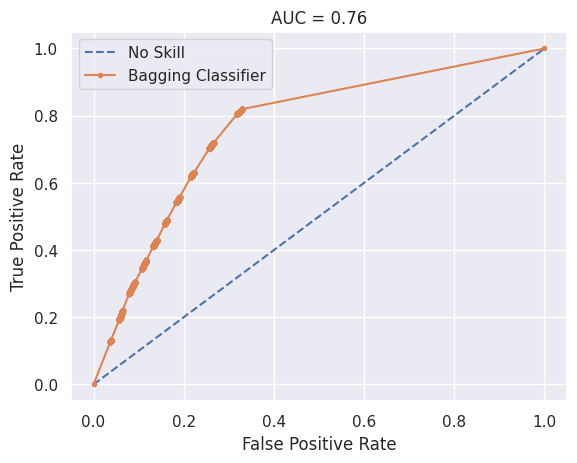

In [135]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = model_4.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Bagging Classifier')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

####Cross- Validation & Hyperparameter Tuning

In [136]:
param_grid = {'n_estimators': [10,20,30]}
grid_model4=GridSearchCV(model_4,param_grid,scoring='roc_auc',cv=5)
# Fit the Algorithm
grid_bc=grid_model4.fit(x_train_resampled,y_train_resampled)
# Make predictions on the test data
y_pred = grid_bc.predict(x_test)

# Make predictions on the train data
y_pred_train=grid_bc.predict(x_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

In [137]:
# get the best score
best_score = grid_bc.best_score_
print(f'best_score-{best_score}')

best_score-0.9374704511542798


In [138]:
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm_bc = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm_bc)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy_train_data: 0.9586502540285418
Accuracy_test_data: 0.8047020545249403
ROC AUC score: 0.6491460693333133
Confusion matrix:
[[57129  9570]
 [ 5316  4207]]
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     66699
           1       0.31      0.44      0.36      9523

    accuracy                           0.80     76222
   macro avg       0.61      0.65      0.62     76222
weighted avg       0.84      0.80      0.82     76222



In [139]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = grid_bc.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

####ML Model 5

In [140]:
# ML Model - 5 Implementation
# Instantiate the RandomForestClassifier model
model_5 = RandomForestClassifier(random_state=42)
# Fit the Algorithm
# Train the model on the resampled training data
model_5.fit(x_train_resampled, y_train_resampled)
# Predict on the model
# Make predictions on the test data
y_pred = model_5.predict(x_test)

# Make predictions on the train data
y_pred_train=model_5.predict(x_train)

In [141]:
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy_train_data: 0.961320095641992
Accuracy_test_data: 0.8002282805489229
ROC AUC score: 0.6565816070122719
Confusion matrix:
[[56566 10133]
 [ 5094  4429]]
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     66699
           1       0.30      0.47      0.37      9523

    accuracy                           0.80     76222
   macro avg       0.61      0.66      0.62     76222
weighted avg       0.84      0.80      0.82     76222



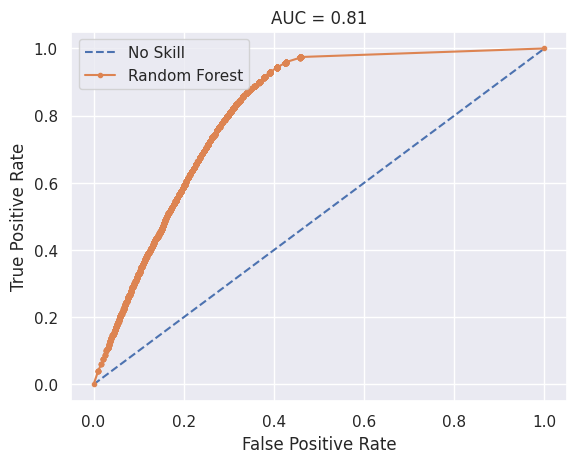

In [142]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = model_5.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

####Cross- Validation & Hyperparameter Tuning

In [143]:
param_grid = {'n_estimators': [10, 50], 'max_depth': [5, 10,20]}
grid_model5=GridSearchCV(model_5,param_grid,scoring='roc_auc',cv=5)
# Fit the Algorithm
grid_rf=grid_model5.fit(x_train_resampled,y_train_resampled)
# Make predictions on the test data
y_pred = grid_rf.predict(x_test)
# Make predictions on the train data
y_pred_train=grid_rf.predict(x_train)

In [144]:
# get the best score
best_score = grid_rf.best_score_
print(f'best_score-{best_score}')

best_score-0.9131888434092268


In [145]:
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm_rf)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy_train_data: 0.7661067871047306
Accuracy_test_data: 0.7390123586366141
ROC AUC score: 0.7783667788391347
Confusion matrix:
[[48417 18282]
 [ 1611  7912]]
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     66699
           1       0.30      0.83      0.44      9523

    accuracy                           0.74     76222
   macro avg       0.63      0.78      0.64     76222
weighted avg       0.88      0.74      0.78     76222



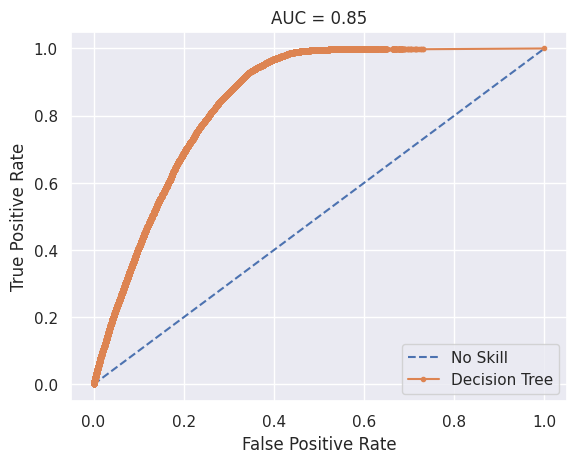

In [146]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = grid_rf.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

####ML Model-6

In [147]:
# ML Model - 6 Implementation
# Instantiate the ExtraTreesClassifier model
model_6 = ExtraTreesClassifier( random_state=42)
# Fit the Algorithm
# Train the model on the resampled training data
model_6.fit(x_train_resampled, y_train_resampled)
# Predict on the model
# Make predictions on the test data
y_pred = model_6.predict(x_test)

# Make predictions on the train data
y_pred_train=model_6.predict(x_train)

In [148]:
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy_train_data: 0.9618612797528264
Accuracy_test_data: 0.800083965259374
ROC AUC score: 0.651863312847926
Confusion matrix:
[[56658 10041]
 [ 5197  4326]]
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     66699
           1       0.30      0.45      0.36      9523

    accuracy                           0.80     76222
   macro avg       0.61      0.65      0.62     76222
weighted avg       0.84      0.80      0.82     76222



In [149]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = model_6.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label=' ExtraTrees')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

####Cross- Validation & Hyperparameter Tuning

In [150]:
param_grid = {'n_estimators': [10, 50], 'max_depth': [5, 10,20]}
grid_model6=GridSearchCV(model_6,param_grid,scoring='roc_auc',cv=5)
# Fit the Algorithm
grid_xt=grid_model6.fit(x_train_resampled,y_train_resampled)
# Make predictions on the test data
y_pred = grid_xt.predict(x_test)

# Make predictions on the train data
y_pred_train=grid_xt.predict(x_train)

In [151]:
# get the best score
best_score = grid_xt.best_score_
print(f'best_score-{best_score}')

best_score-0.9018849763595839


In [152]:
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm_xt = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm_xt)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy_train_data: 0.7495629528317048
Accuracy_test_data: 0.7277426464800189
ROC AUC score: 0.7863750015926724
Confusion matrix:
[[47237 19462]
 [ 1290  8233]]
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     66699
           1       0.30      0.86      0.44      9523

    accuracy                           0.73     76222
   macro avg       0.64      0.79      0.63     76222
weighted avg       0.89      0.73      0.77     76222



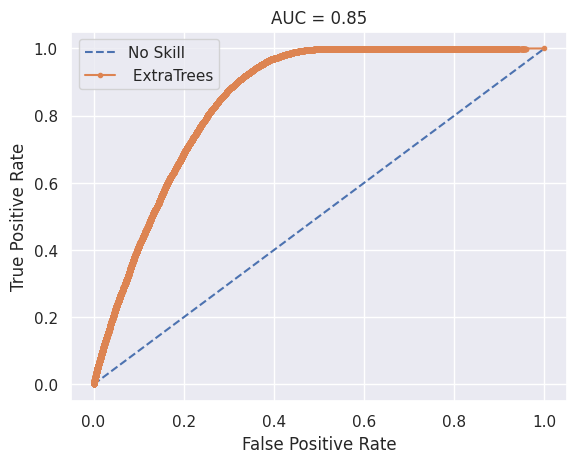

In [153]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs =grid_xt.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label=' ExtraTrees')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

####ML Model 7

In [154]:
# ML Model - 7 Implementation
# Instantiate the AdaBoostClassifier model
model_7 = AdaBoostClassifier(random_state=42)
# Fit the Algorithm
# Train the model on the resampled training data
model_7.fit(x_train_resampled, y_train_resampled)
# Predict on the model
# Make predictions on the test data
y_pred = model_7.predict(x_test)

# Make predictions on the train data
y_pred_train=model_7.predict(x_train)

In [155]:
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy_train_data: 0.6937685109565184
Accuracy_test_data: 0.6979349794022723
ROC AUC score: 0.7937376514362603
Confusion matrix:
[[44423 22276]
 [  748  8775]]
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.67      0.79     66699
           1       0.28      0.92      0.43      9523

    accuracy                           0.70     76222
   macro avg       0.63      0.79      0.61     76222
weighted avg       0.90      0.70      0.75     76222



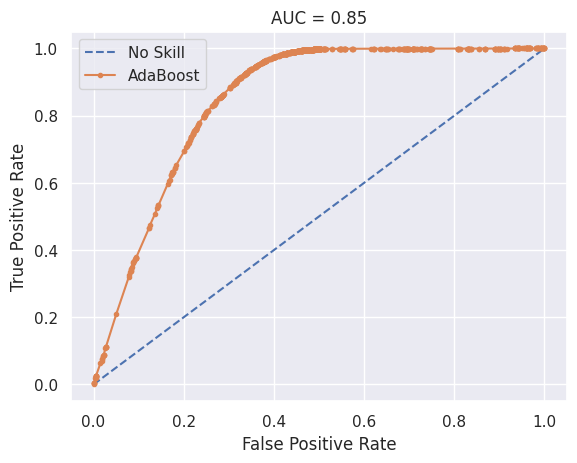

In [156]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = model_7.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='AdaBoost')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

####Cross- Validation & Hyperparameter Tuning

In [157]:
param_grid ={'n_estimators': [10, 50], 'learning_rate': [0.1, 0.5, 1.0]}
grid_model7=GridSearchCV(model_7,param_grid,scoring='roc_auc',cv=5)
# Fit the Algorithm
grid_ab=grid_model7.fit(x_train_resampled,y_train_resampled)
# Make predictions on the test data
y_pred = grid_ab.predict(x_test)

# Make predictions on the train data
y_pred_train=grid_ab.predict(x_train)

In [158]:
# get the best score
best_score = grid_ab.best_score_
print(f'best_score-{best_score}')

best_score-0.8536577008953957


In [159]:
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm_ab = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm_ab)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy_train_data: 0.6937685109565184
Accuracy_test_data: 0.6979349794022723
ROC AUC score: 0.7937376514362603
Confusion matrix:
[[44423 22276]
 [  748  8775]]
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.67      0.79     66699
           1       0.28      0.92      0.43      9523

    accuracy                           0.70     76222
   macro avg       0.63      0.79      0.61     76222
weighted avg       0.90      0.70      0.75     76222



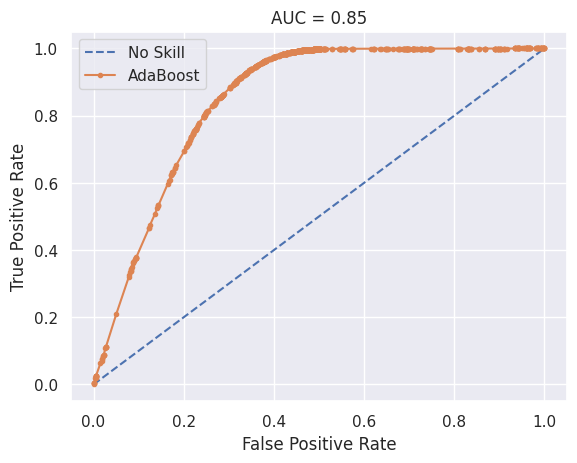

In [160]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = grid_ab.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='AdaBoost')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

####ML Model-8

In [161]:
# ML Model - 8 Implementation
# Instantiate the XGBClassifier model
model_8 = xgb.XGBClassifier(random_state=42)
# Fit the Algorithm
# Train the model on the resampled training data
model_8.fit(x_train_resampled, y_train_resampled)
# Predict on the model
# Make predictions on the test data
y_pred = model_8.predict(x_test)

# Make predictions on the train data
y_pred_train=model_8.predict(x_train)

In [162]:
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy_train_data: 0.7735029699528022
Accuracy_test_data: 0.7722179948046496
ROC AUC score: 0.7581380228950818
Confusion matrix:
[[51819 14880]
 [ 2482  7041]]
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     66699
           1       0.32      0.74      0.45      9523

    accuracy                           0.77     76222
   macro avg       0.64      0.76      0.65     76222
weighted avg       0.88      0.77      0.81     76222



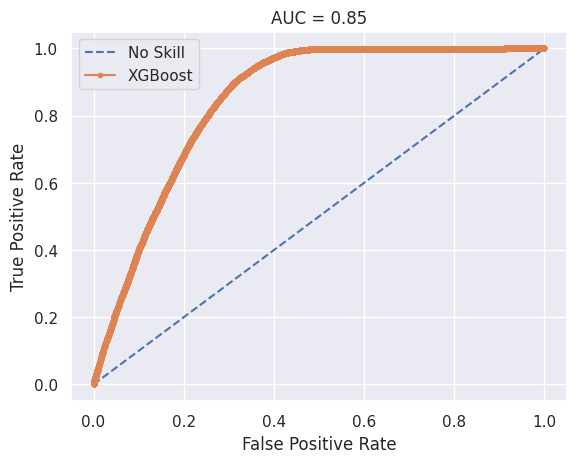

In [163]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = model_8.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

####Cross- Validation & Hyperparameter Tuning

In [164]:
param_grid ={'n_estimators': [10, 50], 'learning_rate': [0.1, 0.5, 1.0]}
grid_model8=GridSearchCV(model_8,param_grid,scoring='roc_auc',cv=5)
# Fit the Algorithm
grid_xg=grid_model8.fit(x_train_resampled,y_train_resampled)
# Make predictions on the test data
y_pred = grid_xg.predict(x_test)

# Make predictions on the train data
y_pred_train=grid_xg.predict(x_train)

In [165]:
# get the best score
best_score = grid_xg.best_score_
print(f'best_score-{best_score}')

best_score-0.9397773213105344


In [166]:
# Visualizing evaluation Metric Score chart
# Calculate accuracy
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy_train_data:", accuracy_train)
print("Accuracy_test_data:", accuracy_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

# Calculate confusion matrix
cm_xg = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm_xg)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Accuracy_train_data: 0.7927166458392781
Accuracy_test_data: 0.7867282411902076
ROC AUC score: 0.7278570612564048
Confusion matrix:
[[53782 12917]
 [ 3339  6184]]
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     66699
           1       0.32      0.65      0.43      9523

    accuracy                           0.79     76222
   macro avg       0.63      0.73      0.65     76222
weighted avg       0.86      0.79      0.81     76222



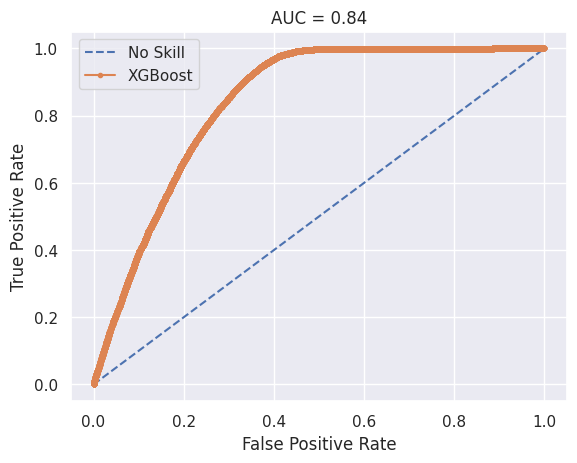

In [167]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for the test data using logistic regression model
lr_probs = grid_xg.predict_proba(x_test)[:, 1]

# calculate roc curves for the no skill model and the logistic regression model
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the logistic regression model and the no skill model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost')

# set the x and y axis labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = %.2f' % auc(lr_fpr, lr_tpr))

# display the legend and show the plot
plt.legend()
plt.show()

* **Dataset is imbalance hence we can't evaluate our models on accuracy, therefore we are evaluating our model on the basis on ROC AUC Scores.**
* **ROC AUC Scores are best for Adaboost model with highest score of 0.7934.**
* **ROC score and AUC is looking good for logestic regression,Naive Bayes and for some ensemble Classifier too**
* **Decision Tree are not performing well as compared to other models.**
* **It's a Good decision to choose logestic regression or Gaussian Naive Bayes as our model because in that case false negative is lowest, we don't want to missclassify those customers which want to adopt the vehicle insurance although in this case it have a higher false positive rate. In other words, they may identify some negative cases as positive, which could result in unnecessary or incorrect actions.**

####Feature Importance for best models

**AdaBoost**

In [168]:
importance=model_7.feature_importances_
importance_dict={'Features':list(x.columns),
                 'importance':importance}
importancee_df=pd.DataFrame(importance_dict)                 

In [169]:
importancee_df

Features  importance
0                  Age        0.68
1          Region_Code        0.12
2   Previously_Insured        0.06
3          Vehicle_Age        0.04
4       Vehicle_Damage        0.08
5       Annual_Premium        0.00
6  Sales_Channel_Group        0.02

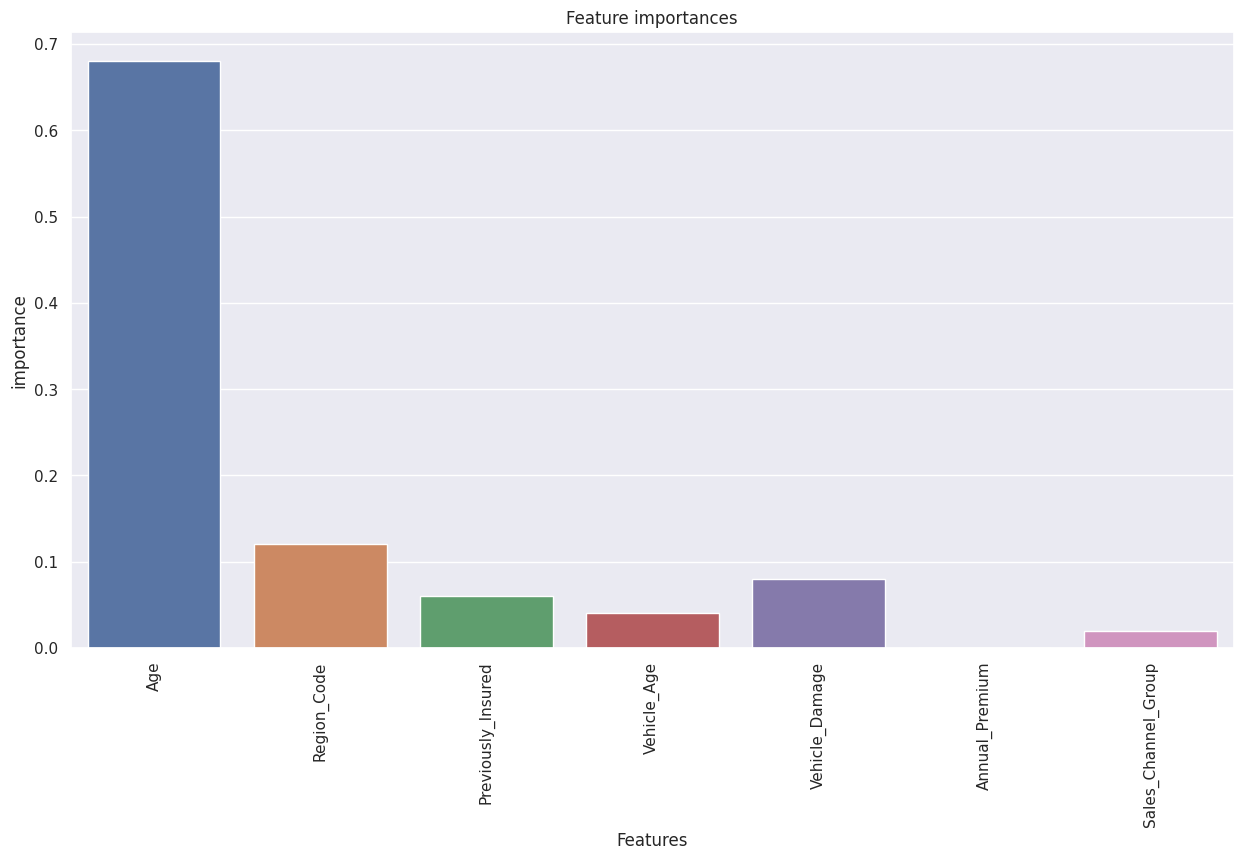

In [170]:
# Plot the feature importances as a barplot
plt.figure(figsize=(15,8))
plt.title("Feature importances")
sns.barplot(x='Features', y='importance', data=importancee_df)
plt.xticks(range(len(importancee_df)), importancee_df['Features'], rotation=90)
plt.show()



* **Age has impacted the most in predection in adaboost model.**
* **Sales_Channel_group, Annual premium has impacted least in prediction**

**Logestic Regression**

In [171]:
# Get the coefficients of the independent variables
coefficients = model.coef_[0]

# Take absolute values of coefficients
abs_coefficients = np.abs(coefficients)

# Create a dictionary of feature importance with variable names as keys and feature importance values as values
feature_importance = dict(zip(x.columns, abs_coefficients))

# Sort the feature importance dictionary by descending order of feature importance
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importance
print(sorted_feature_importance)

# Visualize the sorted feature importance

plt.barh(range(len(sorted_feature_importance)), [val[1] for val in sorted_feature_importance], align='center')
plt.yticks(range(len(sorted_feature_importance)), [val[0] for val in sorted_feature_importance])
plt.xlabel('Feature Importance')
plt.show()


[('Previously_Insured', 2.0429469405029526), ('Vehicle_Damage', 0.9932730253252113), ('Vehicle_Age', 0.4512353776519615), ('Age', 0.2984244325483024), ('Sales_Channel_Group', 0.0944618838837236), ('Annual_Premium', 0.023925475596667436), ('Region_Code', 0.003001276758389113)]


* **Customer have previously insurance or not is the most important feature in Logestic Regression**

# **Conclusion**

* **The goal of the project was to predict whether customers who had health insurance with the client would also be interested in vehicle insurance.**
* **Demographic, vehicle, and policy data were available for each customer in the dataset.**
* **The data was cleaned and preprocessed, including feature engineering and outlier removal.**
* **The dataset was imbalanced, so SMOTE was used to balance the classes.
Several classification models were trained and evaluated, including logistic regression, Gaussian naive Bayes, decision tree, random forest, extra tree, AdaBoost, and XGBoost.**
* **The evaluation metrics used were precision, recall, and ROC AUC.
The AdaBoost model had the highest ROC AUC score of 0.7934.**
* **However, we observed that the precision for category 1 was low, indicating that there is scope for improvement in the model's performance.**

---
**Scope of Improvment**
* **If the precision for Category 1(Accepting insurance) is low, it means that the model is making a high number of false positive predictions for customers who are not interested in Vehicle Insurance but are being targeted by the company. This could result in the company wasting resources and money on marketing and communication strategies that are not effective, as these customers are not interested in purchasing the product.**

* **Moreover, if the company continuously sends irrelevant messages to customers, it may lead to a negative customer experience and brand perception, which can have long-term consequences on the company's reputation and revenue.**


# **Understanding how my project is useful to stakeholders**

* **The stakeholders can use the model to predict which customers are more likely to be interested in vehicle insurance. This will help them target their marketing efforts more effectively and improve their conversion rates.**
* **By targeting only those customers who are likely to be interested in vehicle insurance, the stakeholders can save on marketing costs and other related expenses.**
* **With a better understanding of their customers' needs and preferences, the stakeholders can offer more relevant insurance products and services, leading to increased customer satisfaction and loyalty. This, in turn, can lead to higher revenue for the company.**